BIOGENESYS

La empresa farmacéutica BIOGENESYS busca identificar las ubicaciones óptimas para la expansión de laboratorios farmacéuticos, basándose en el análisis de datos de incidencia de COVID-19, tasas de vacunación, y la disponibilidad de infraestructuras sanitarias. La meta es optimizar la respuesta a los efectos de la pandemia y postpandemia con el fin de mejorar el acceso a las vacunas.

# Avance 1

### Carga y transformación de los datos

In [1]:
# Importar las librerias necesarias para el Avance 1.
import pandas as pd
import numpy as np

In [2]:
# Leer el dataset data_latinoamerica.csv
data = pd.read_csv("C:/Users/Agus/Desktop/Proyecto Integrador M4/csv/data_latinoamerica.csv", parse_dates=['date'], sep=',')

In [3]:
# Ver los primeros 5 registros para tener un panorama del dataframe.
data.head()

location_key       date country_code country_name  new_confirmed  \
0           AR 2020-01-01           AR    Argentina            3.0   
1           AR 2020-01-02           AR    Argentina           14.0   
2           AR 2020-01-03           AR    Argentina            3.0   
3           AR 2020-01-04           AR    Argentina            7.0   
4           AR 2020-01-05           AR    Argentina            5.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   
3           0.0                  27.0                  0.0   
4           0.0                  32.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                                    NaN  44938712.0  ...   
3                                    NaN  44938712.0  ...   
4                                    NaN  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            NaN   
1                      26.6                        15.8            NaN   
2                      26.6                        15.8            NaN   
3                      26.6                        15.8            NaN   
4                      26.6                        15.8            NaN   

   cumulative_recovered  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 50 columns]

In [4]:
# Ver la cantidad de filas y columnas.
np.shape(data)

(12216057, 50)

In [5]:
# Ver los paises que tiene el dataframe.
paises=data['country_name'].unique()
print(paises)

['Argentina' 'Bolivia' 'Brazil' 'Chile' 'Colombia' 'Costa Rica' 'Cuba'
 'Dominican Republic' 'Ecuador' 'Guatemala' 'Honduras' 'Mexico'
 'Nicaragua' 'Panama' 'Peru' 'Puerto Rico' 'Paraguay' 'El Salvador'
 'Uruguay' 'Venezuela']


### Filtro por paises seleccionados

In [14]:
# Filtro el dataframe con los paises a extenderse y lo guardo en un nuevo dataframe.
paises_seleccionados=['Argentina','Chile','Colombia','Mexico','Peru','Brazil']
data_pais=data[data['country_name'].isin(paises_seleccionados)]

In [7]:
# Ver la nueva cantidad de filas y columnas.
np.shape(data_pais)

(11970289, 50)

Verificación de valores nulos

In [20]:
# Verificar nulos por columna (se filtra por 4000000 porque representa el 30% de los registros).
data_pais.isnull().sum()[data_pais.isnull().sum()>4000000]

Series([], dtype: int64)

Encuentro inconsistencia en las columnas que tienen datos acumulativos con la columna Location Key y decido dejar los los registros que coinciden con el country_code

In [19]:
location_key=data_pais['location_key'].unique()
print(location_key)

['AR' 'BR' 'CL' 'CO' 'MX' 'PE']


### Filtro por Location_Key

In [21]:
data_pais=data_pais[data_pais['location_key'].isin(['AR','CL','CO','MX','PE','BR'])]

### Filtro por fecha

In [22]:
# Filtro el datafrme a partir del 2021-01-01 y lo guardo en un nuevo dataframe.
data_pais_fecha=data_pais[data_pais['date']>'2021-01-01']

### Tratado de valores nulos

In [23]:
# Nueva verificacion de valores nuelos luego del filtro de fecha.
nulos_data_pais=data_pais_fecha.isnull().sum()[data_pais_fecha.isnull().sum()>0]
print(nulos_data_pais)
print(np.shape(data_pais_fecha))

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64
(3744, 50)


In [24]:

# Rellenado de valores nulos.

# Lista de columnas a rellenar con la media por país
columnas_a_rellenar_media = [
    'new_confirmed',
    'new_deceased',
    'cumulative_confirmed',
    'cumulative_deceased',
    'average_temperature_celsius',
    'minimum_temperature_celsius',
    'maximum_temperature_celsius',
    'rainfall_mm',
    'relative_humidity'
]

# Lista de columnas a rellenar con ceros
columnas_a_rellenar_ceros = [
    'new_recovered',
    'cumulative_recovered',
    'cumulative_vaccine_doses_administered'
]

# Copia del DataFrame original
data_filtrada = data_pais_fecha.copy()

# Rellenar valores nulos con la media por país
for columna in columnas_a_rellenar_media:
    media_por_pais = data_pais_fecha.groupby('country_name')[columna].transform('mean')
    data_filtrada[columna] = data_pais_fecha[columna].fillna(media_por_pais)

# Rellenar valores nulos con ceros para las columnas restantes
for columna in columnas_a_rellenar_ceros:
    data_filtrada[columna] = data_filtrada[columna].fillna(0)



In [25]:
# Verificar que no queden valores nulos y ver la nueva cantidad de filas.
nulos_data_filtrada=data_filtrada.isnull().sum()[data_filtrada.isnull().sum()>0]
print(data_filtrada)
print(np.shape(data_filtrada))

         location_key       date country_code country_name  new_confirmed  \
367                AR 2021-01-02           AR    Argentina    7767.000000   
368                AR 2021-01-03           AR    Argentina    4934.000000   
369                AR 2021-01-04           AR    Argentina   13953.000000   
370                AR 2021-01-05           AR    Argentina   14085.000000   
371                AR 2021-01-06           AR    Argentina   14496.000000   
...               ...        ...          ...          ...            ...   
10253872           PE 2022-09-13           PE         Peru    1150.000000   
10253873           PE 2022-09-14           PE         Peru    5032.183871   
10253874           PE 2022-09-15           PE         Peru    5032.183871   
10253875           PE 2022-09-16           PE         Peru    5032.183871   
10253876           PE 2022-09-17           PE         Peru    5032.183871   

          new_deceased  cumulative_confirmed  cumulative_deceased  \
367   

### Save de data_filtrada

In [26]:
# Guardar el dataframe filtrado en un nuevo archivo CSV.
data_filtrada.to_csv('DatosFinalesFiltrado.csv', index=False)

In [27]:
# Resumen del dataframe.
data_filtrada.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3744 entries, 367 to 10253876
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   location_key                           3744 non-null   object        
 1   date                                   3744 non-null   datetime64[ns]
 2   country_code                           3744 non-null   object        
 3   country_name                           3744 non-null   object        
 4   new_confirmed                          3744 non-null   float64       
 5   new_deceased                           3744 non-null   float64       
 6   cumulative_confirmed                   3744 non-null   float64       
 7   cumulative_deceased                    3744 non-null   float64       
 8   cumulative_vaccine_doses_administered  3744 non-null   float64       
 9   population                             3744 non-null   float64

### Conversion del tipo de dato de las columnas de float64 a int

In [28]:
# Convertir el tipo de dato de las columnas de acuerdo al Readme.txt
columnas_a_convertir = [
    'new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
    'population', 'population_male', 'population_female', 'population_rural', 'population_urban',
    'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
    'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
    'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older',
    'new_recovered', 'cumulative_recovered', 'cumulative_vaccine_doses_administered'
]

# Convertir las columnas de float64 a enteros
data_filtrada[columnas_a_convertir] = data_filtrada[columnas_a_convertir].astype(int)

### Estadisticas del dataframe

In [29]:
# Utilizar la funcion .describe() para visualizar la estadistica descriptiva del dataframe.
data_filtrada.describe()

date  new_confirmed  new_deceased  cumulative_confirmed  \
count                 3744    3744.000000   3744.000000          3.744000e+03   
mean   2021-11-09 12:00:00   13921.906784    276.885417          6.777074e+06   
min    2021-01-02 00:00:00    -573.000000      0.000000          9.710000e+02   
25%    2021-06-06 18:00:00    1536.750000     26.000000          2.132216e+06   
50%    2021-11-09 12:00:00    5214.000000    100.500000          3.632144e+06   
75%    2022-04-14 06:00:00   14834.000000    312.000000          6.223497e+06   
max    2022-09-17 00:00:00  298408.000000  11447.000000          3.456883e+07   
std                    NaN   24219.361428    507.240047          7.989269e+06   

       cumulative_deceased  cumulative_vaccine_doses_administered  \
count          3744.000000                           3.744000e+03   
mean         192957.900107                           6.544474e+07   
min               1.000000                           0.000000e+00   
25%           59255.750000                           2.618297e+06   
50%          139614.000000                           3.244576e+07   
75%          214939.500000                           7.478108e+07   
max          685203.000000                           3.478685e+08   
std          182798.790297                           9.247680e+07   

         population  population_male  population_female  population_rural  \
count  3.744000e+03     3.744000e+03       3.744000e+03      3.744000e+03   
mean   7.772147e+07     3.787035e+07       3.927162e+07      1.255498e+07   
min    1.757400e+07     8.972014e+06       8.601989e+06      2.341903e+06   
25%    2.938188e+07     1.445076e+07       1.493113e+07      3.599141e+06   
50%    4.791080e+07     2.225416e+07       2.324582e+07      8.316128e+06   
75%    1.109920e+08     5.485523e+07       5.748131e+07      2.494867e+07   
max    2.125594e+08     1.044358e+08       1.081236e+08      2.780789e+07   
std    6.713776e+07     3.318494e+07       3.448407e+07      1.008074e+07   

       ...  population_largest_city  area_rural_sq_km  area_urban_sq_km  \
count  ...             3.744000e+03      3.744000e+03       3744.000000   
mean   ...             1.443888e+07      2.636580e+06      59502.500000   
min    ...             6.723516e+06      7.094180e+05      12027.000000   
25%    ...             1.055471e+07      1.090598e+06      16425.000000   
50%    ...             1.291832e+07      1.543881e+06      45582.000000   
75%    ...             2.167191e+07      2.690269e+06     102418.000000   
max    ...             2.184651e+07      8.241430e+06     134981.000000   
std    ...             5.710077e+06      2.584740e+06      45125.320206   

       life_expectancy  adult_male_mortality_rate  \
count      3744.000000                3744.000000   
mean         76.808500                 154.274667   
min          74.992000                 107.669000   
25%          75.672000                 146.370000   
50%          76.518000                 149.351000   
75%          77.109000                 184.379000   
max          80.042000                 188.528000   
std           1.597394                  27.000146   

       adult_female_mortality_rate  pollution_mortality_rate  \
count                  3744.000000               3744.000000   
mean                     81.428000                 36.566667   
min                      59.035000                 25.300000   
25%                      77.999000                 26.600000   
50%                      82.149000                 33.300000   
75%                      91.421000                 37.000000   
max                      95.815000                 63.900000   
std                      11.800623                 13.027569   

       comorbidity_mortality_rate  new_recovered  cumulative_recovered  
count                 3744.000000    3744.000000          3.744000e+03  
mean                    14.816667    8263.612179          3.894398e+06  
min                     12

PREGUNTAS


• ¿Qué implican estas métricas y cómo pueden ayudar en el análisis de datos?


Implica visualizar un resumen de las principales caracteristicas de los datos, como su media, su mediana, el rango, la desviacion estandar, que ayudan a identificar la distribucion y el comportamiento de los datos.

• ¿Se muestran todas las estadísticas en todas las columnas durante el análisis?

Solo se muestran en las columnas numericas, ya que no es posible en str.

• ¿Cuál es la razón de la respuesta anterior y cómo podría afectar la interpretación de los resultados obtenidos?

La exclusion de columnas no numericas es necesaria para evitar errores y resultados confusos.

In [31]:
# Crear una función que permita obtener la mediana, varianza y el rango.

def estadistica_descriptiva(data_filtrada):
    for i in data_filtrada.columns:
        if data_filtrada[i].dtype==('int64','float64'):
            print(i)
            print('Mediana:',data[i].median())
            print('Varianza:',data[i].var())
            print('rango:',data[i].max()-data[i].min())
            print('-----------------------------------')

estadistica_descriptiva(data_filtrada)
    

new_confirmed
Mediana: 0.0
Varianza: 600271.6298124301
rango: 372315.0
-----------------------------------
new_deceased
Mediana: 0.0
Varianza: 327.46051660143434
rango: 15556.0
-----------------------------------
cumulative_confirmed
Mediana: 606.0
Varianza: 71101950734.60394
rango: 34568833.0
-----------------------------------
cumulative_deceased
Mediana: 12.0
Varianza: 47720070.2299384
rango: 685203.0
-----------------------------------
cumulative_vaccine_doses_administered
Mediana: 15402.0
Varianza: 194588807944039.53
rango: 347868481.0
-----------------------------------
population
Mediana: 11405.0
Varianza: 5983000912832.292
rango: 212559405.0
-----------------------------------
population_male
Mediana: 5527.0
Varianza: 1514990256118.1191
rango: 104435771.0
-----------------------------------
population_female
Mediana: 5471.0
Varianza: 1635036282299.2407
rango: 108123597.0
-----------------------------------
population_rural
Mediana: 3026413.0
Varianza: 53473254397631.195
rango: 

# Avance 2

### Análisis Exploratorio – Visualización

In [32]:
# Importacion de las nuevas librerias a utilizar
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Visualizar el dataframe
data_filtrada.head()

location_key       date country_code country_name  new_confirmed  \
367           AR 2021-01-02           AR    Argentina           7767   
368           AR 2021-01-03           AR    Argentina           4934   
369           AR 2021-01-04           AR    Argentina          13953   
370           AR 2021-01-05           AR    Argentina          14085   
371           AR 2021-01-06           AR    Argentina          14496   

     new_deceased  cumulative_confirmed  cumulative_deceased  \
367           166               1670634                46688   
368           157               1675568                46845   
369           157               1689521                47002   
370           160               1703606                47162   
371           131               1718102                47293   

     cumulative_vaccine_doses_administered  population  ...  \
367                                  20334    44938712  ...   
368                                  20529    44938712  ...   
369                                  25164    44938712  ...   
370                                  29852    44938712  ...   
371                                  34162    44938712  ...   

     population_largest_city  area_rural_sq_km  area_urban_sq_km  \
367               15057273.0         2690269.0           55032.0   
368               15057273.0         2690269.0           55032.0   
369               15057273.0         2690269.0           55032.0   
370               15057273.0         2690269.0           55032.0   
371               15057273.0         2690269.0           55032.0   

     life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
367            76.52                    147.086                       79.483   
368            76.52                    147.086                       79.483   
369            76.52                    147.086                       79.483   
370            76.52                    147.086                       79.483   
371            76.52                    147.086                       79.483   

     pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
367                      26.6                        15.8              0   
368                      26.6                        15.8              0   
369                      26.6                        15.8              0   
370                      26.6                        15.8              0   
371                      26.6                        15.8              0   

     cumulative_recovered  
367                     0  
368                     0  
369                     0  
370                     0  
371                     0  

[5 rows x 50 columns]

In [34]:
# Grupos de variables

# COVID-19
variables_covid19 = ['new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased', 'new_recovered', 'cumulative_recovered']

# Vacunacion
variables_vacunacion = ['cumulative_vaccine_doses_administered', 'population']

# Demografia
variables_genero = ['population_male', 'population_female', 'population']
variables_zona = ['population_rural', 'population_urban']
variables_grupo_edad = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29',
                        'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
                        'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older'
]



# Análisis Estadístico con Pandas, Numpy y Visualización de Datos con Matplotlib y Seaborn

### Matriz de correlación.

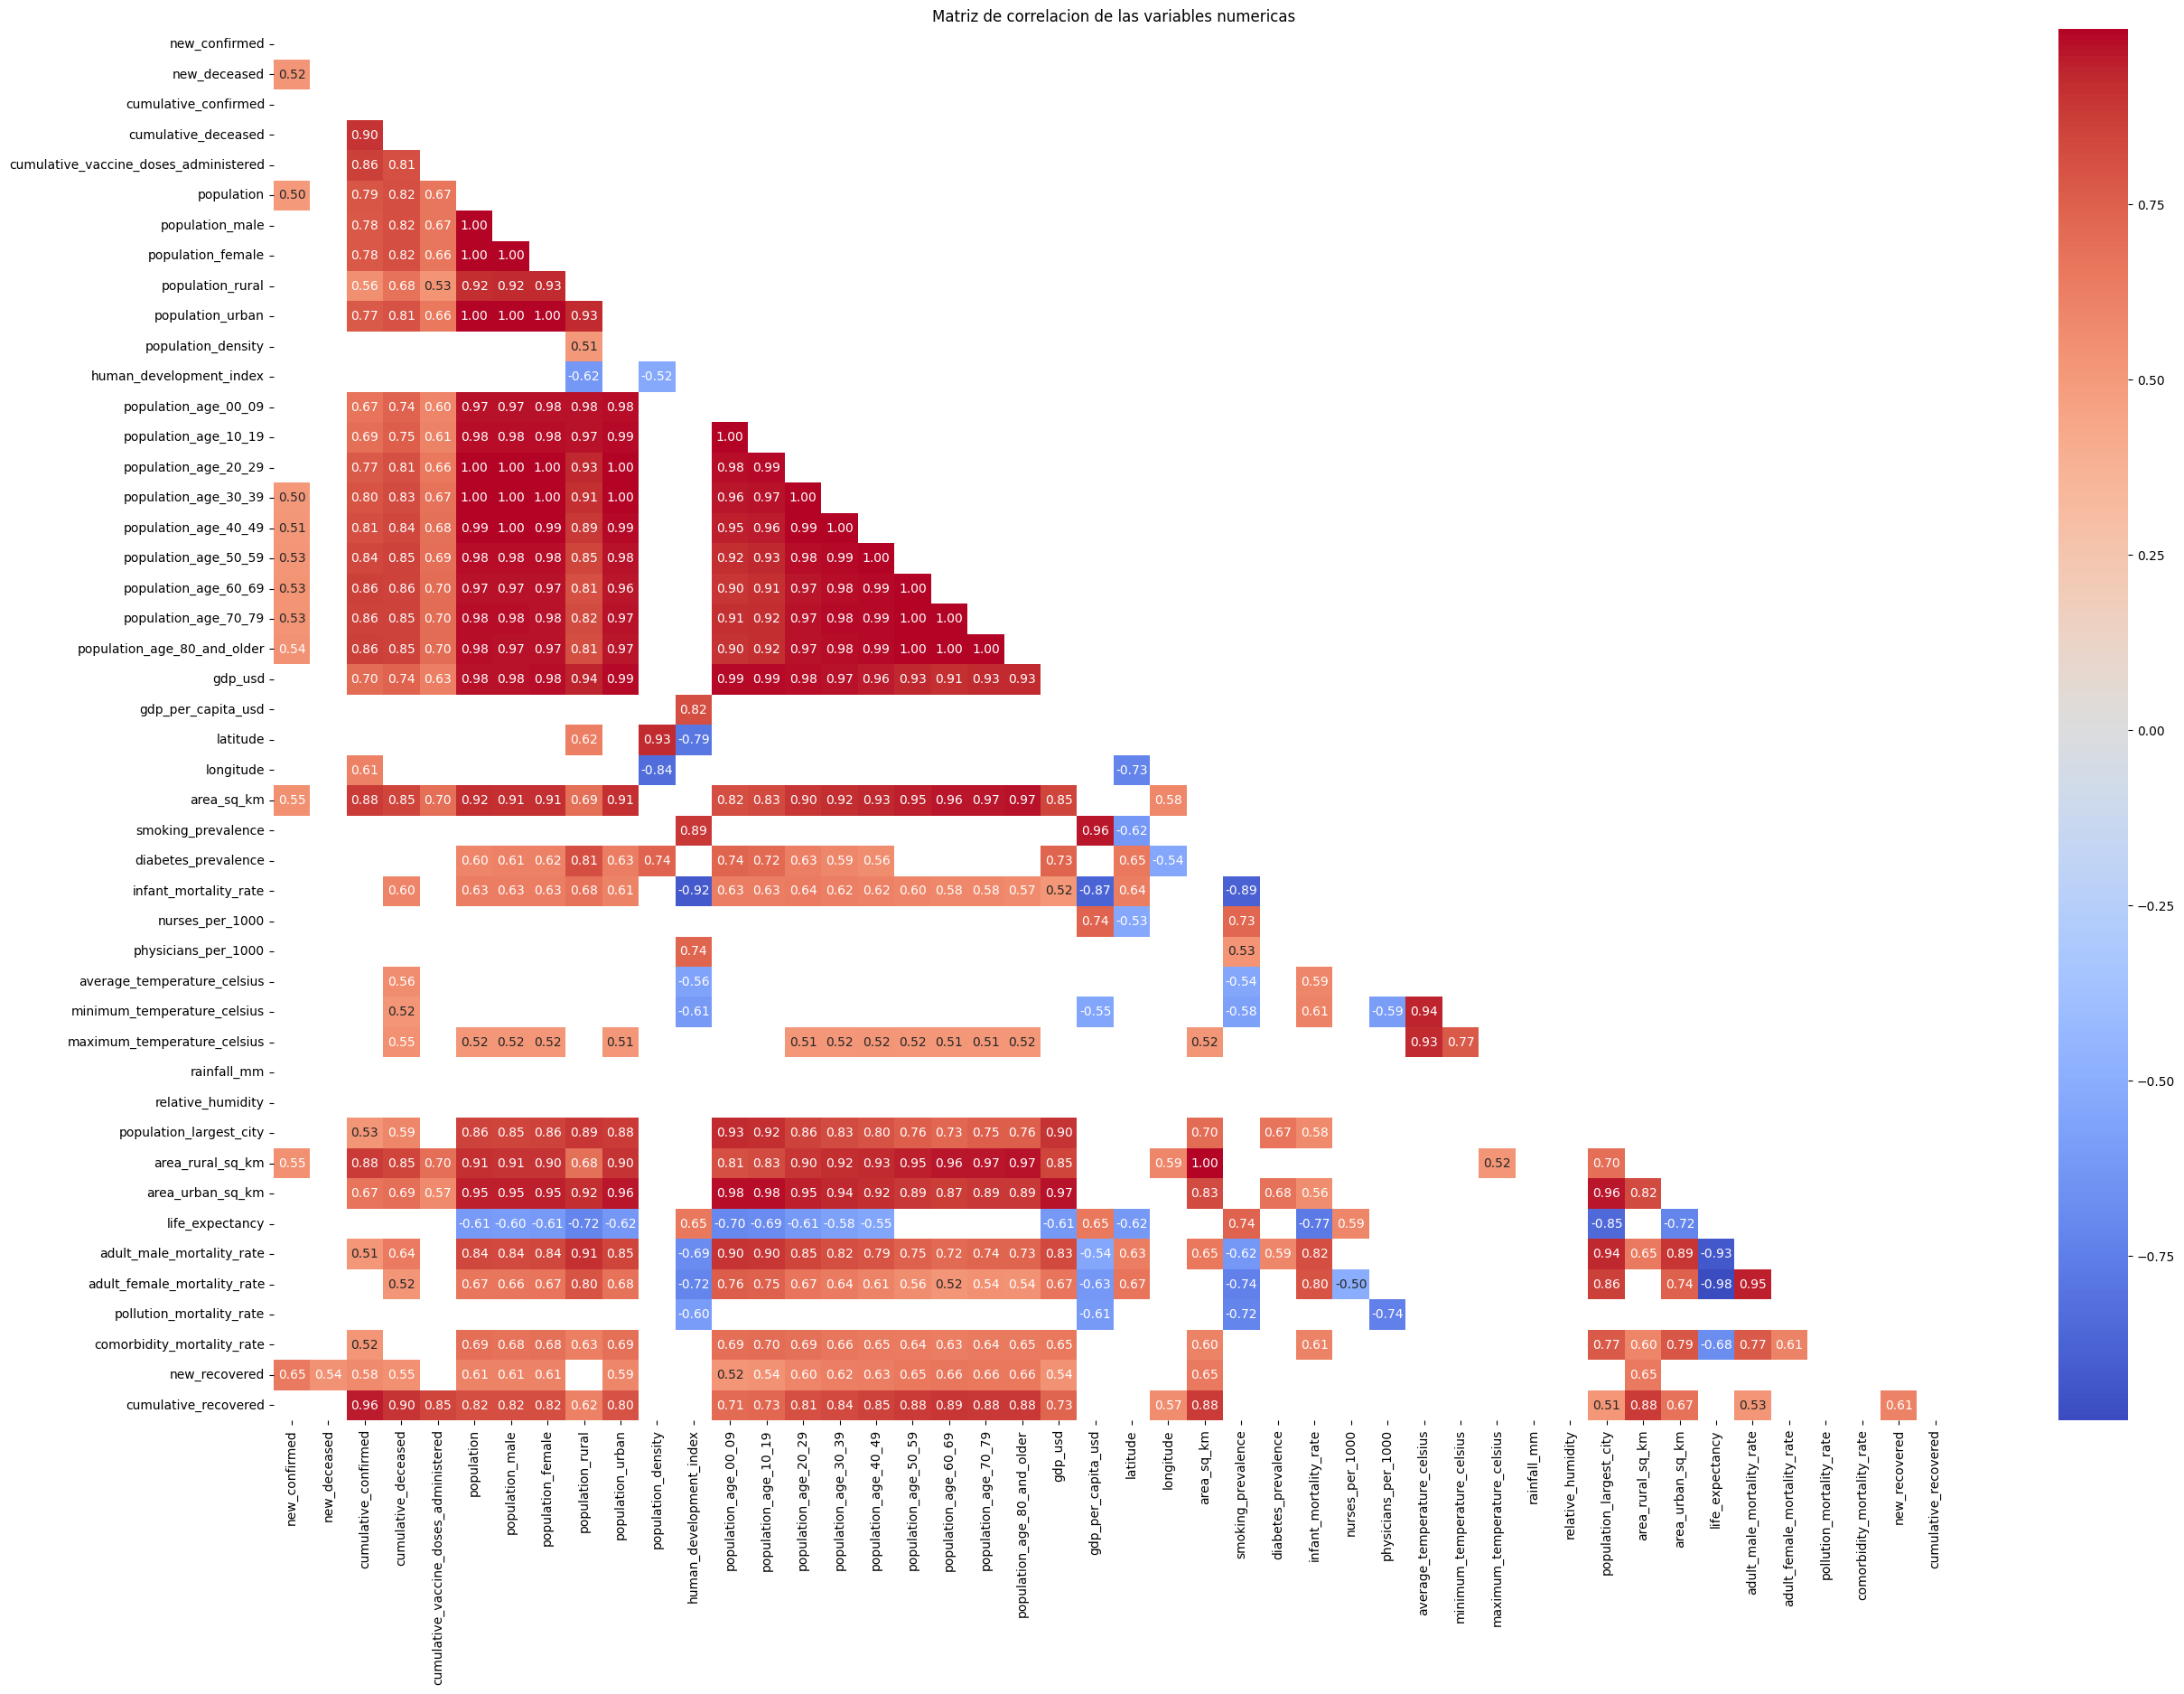

In [35]:
# Matriz de correlacion de las variables numericas
columnas_numericas = data_filtrada.select_dtypes(include=['float64', 'int64']).columns
matriz_corr = data_filtrada[columnas_numericas].corr()

# Mascara para solo tomar una parte del gráfico y filtrar por los valores mayores a 0.5.
mask = np.triu(np.ones_like(matriz_corr, dtype=bool))
matriz_corr = matriz_corr[abs(matriz_corr) > abs(0.5)]

# Creacion de la figura
plt.figure(figsize=(30, 20))

# Mapa de calor de la matriz de correlacion de las variables numericas
sns.heatmap(data=matriz_corr, mask=mask, annot=True, cmap='coolwarm', fmt='.2f' )
plt.title('Matriz de correlacion de las variables numericas')

plt.show()

### Diagrama de dispersión de la temperatura media contra los casos confirmados.

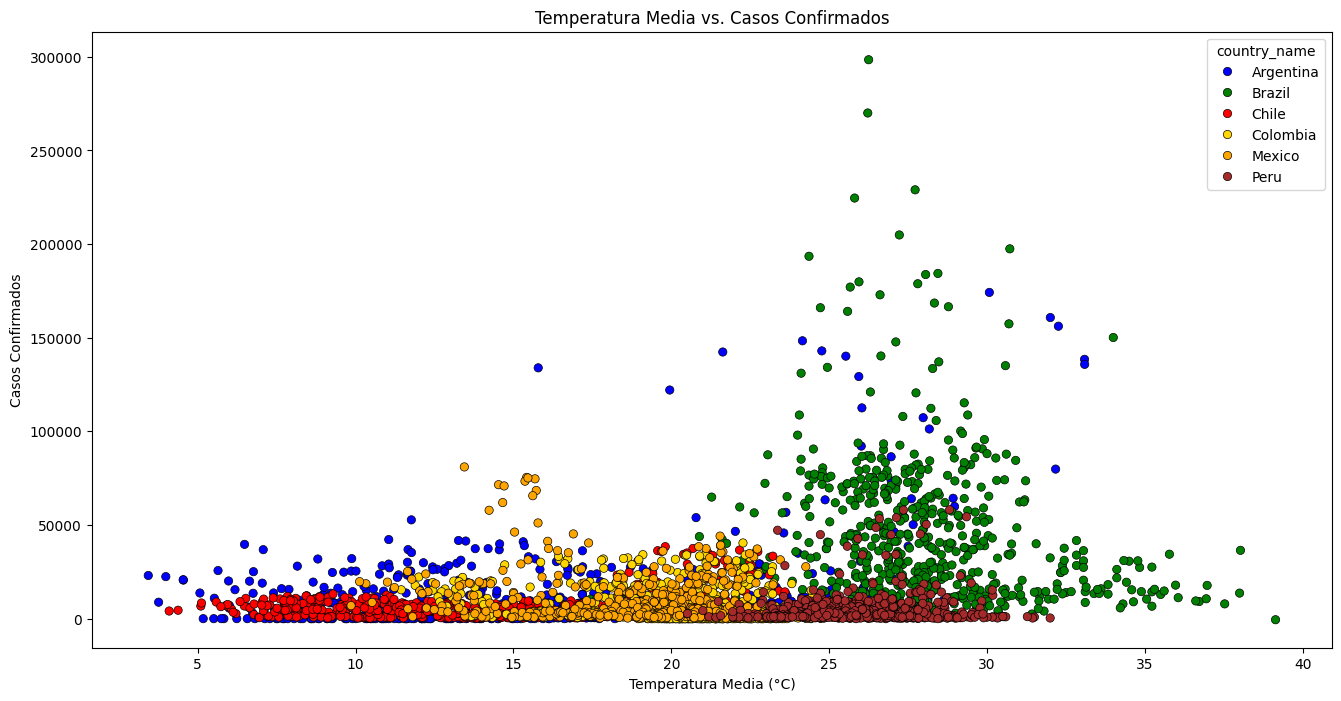

In [37]:
# Diagrama de dispersión de la temperatura media contra los casos confirmados.

# Creacion de la figura
plt.figure(figsize=(16, 8))

# Diagrama de dispersion de la temperatura media vs casos confirmados
sns.scatterplot(data_filtrada, x='average_temperature_celsius', y='new_confirmed', hue='country_name', edgecolor='black', palette=['blue', 'green', 'red', 'gold', 'orange', 'brown'])

plt.title('Temperatura Media vs. Casos Confirmados')
plt.xlabel('Temperatura Media (°C)')
plt.ylabel('Casos Confirmados')

plt.show()

In [38]:
data_filtrada.head()

location_key       date country_code country_name  new_confirmed  \
367           AR 2021-01-02           AR    Argentina           7767   
368           AR 2021-01-03           AR    Argentina           4934   
369           AR 2021-01-04           AR    Argentina          13953   
370           AR 2021-01-05           AR    Argentina          14085   
371           AR 2021-01-06           AR    Argentina          14496   

     new_deceased  cumulative_confirmed  cumulative_deceased  \
367           166               1670634                46688   
368           157               1675568                46845   
369           157               1689521                47002   
370           160               1703606                47162   
371           131               1718102                47293   

     cumulative_vaccine_doses_administered  population  ...  \
367                                  20334    44938712  ...   
368                                  20529    44938712  ...   
369                                  25164    44938712  ...   
370                                  29852    44938712  ...   
371                                  34162    44938712  ...   

     population_largest_city  area_rural_sq_km  area_urban_sq_km  \
367               15057273.0         2690269.0           55032.0   
368               15057273.0         2690269.0           55032.0   
369               15057273.0         2690269.0           55032.0   
370               15057273.0         2690269.0           55032.0   
371               15057273.0         2690269.0           55032.0   

     life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
367            76.52                    147.086                       79.483   
368            76.52                    147.086                       79.483   
369            76.52                    147.086                       79.483   
370            76.52                    147.086                       79.483   
371            76.52                    147.086                       79.483   

     pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
367                      26.6                        15.8              0   
368                      26.6                        15.8              0   
369                      26.6                        15.8              0   
370                      26.6                        15.8              0   
371                      26.6                        15.8              0   

     cumulative_recovered  
367                     0  
368                     0  
369                     0  
370                     0  
371                     0  

[5 rows x 50 columns]

### Diagrama de dispersión de la temperatura media contra las muertes confirmadas.

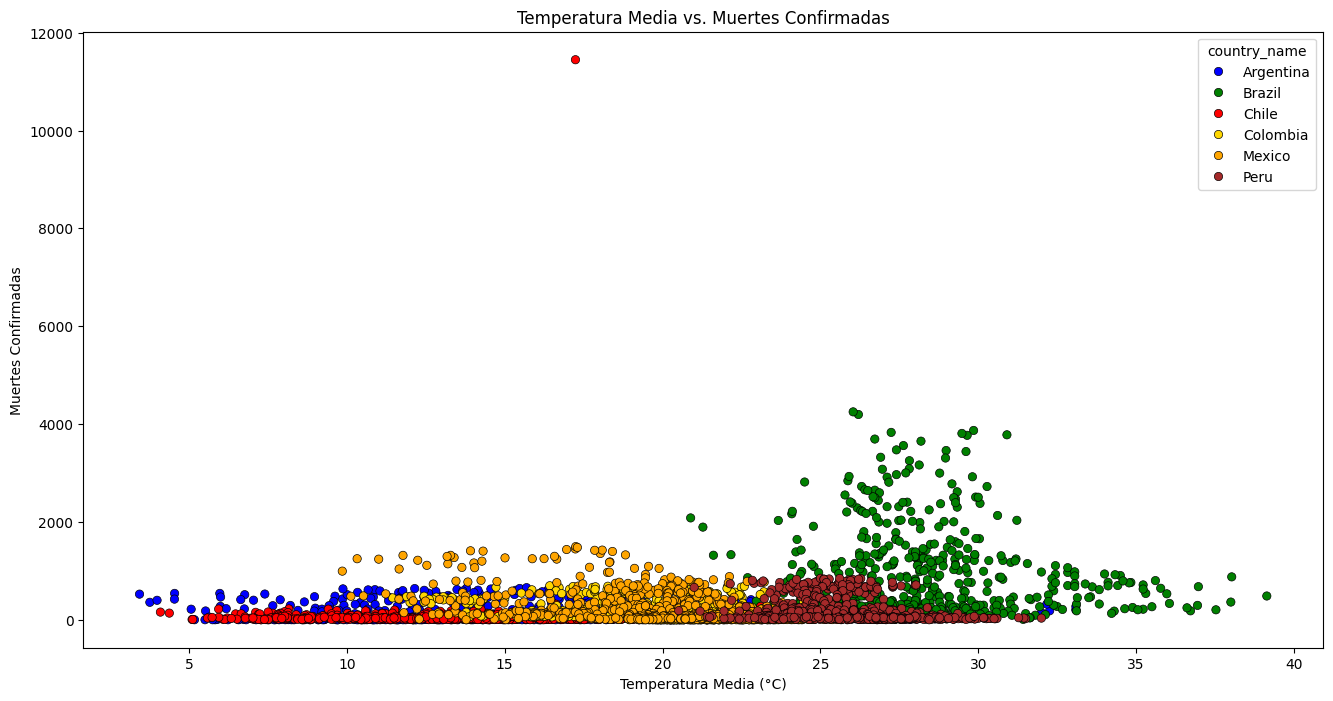

In [39]:
# Diagrama de dispersión de la temperatura media contra las muertes confirmadas.

# Creacion de la figura
plt.figure(figsize=(16, 8))

# Grafico de dispersion de la temperatura media vs muertes confirmadas
sns.scatterplot(data_filtrada, x='average_temperature_celsius', y='new_deceased', hue='country_name', edgecolor='black', palette=['blue', 'green', 'red', 'gold', 'orange', 'brown'])

# Añadir titulo y etiquetas
plt.title('Temperatura Media vs. Muertes Confirmadas')
plt.xlabel('Temperatura Media (°C)')
plt.ylabel('Muertes Confirmadas')

plt.show()

### Comportamiento de las dosis administradas en America Latina (Valor medio).

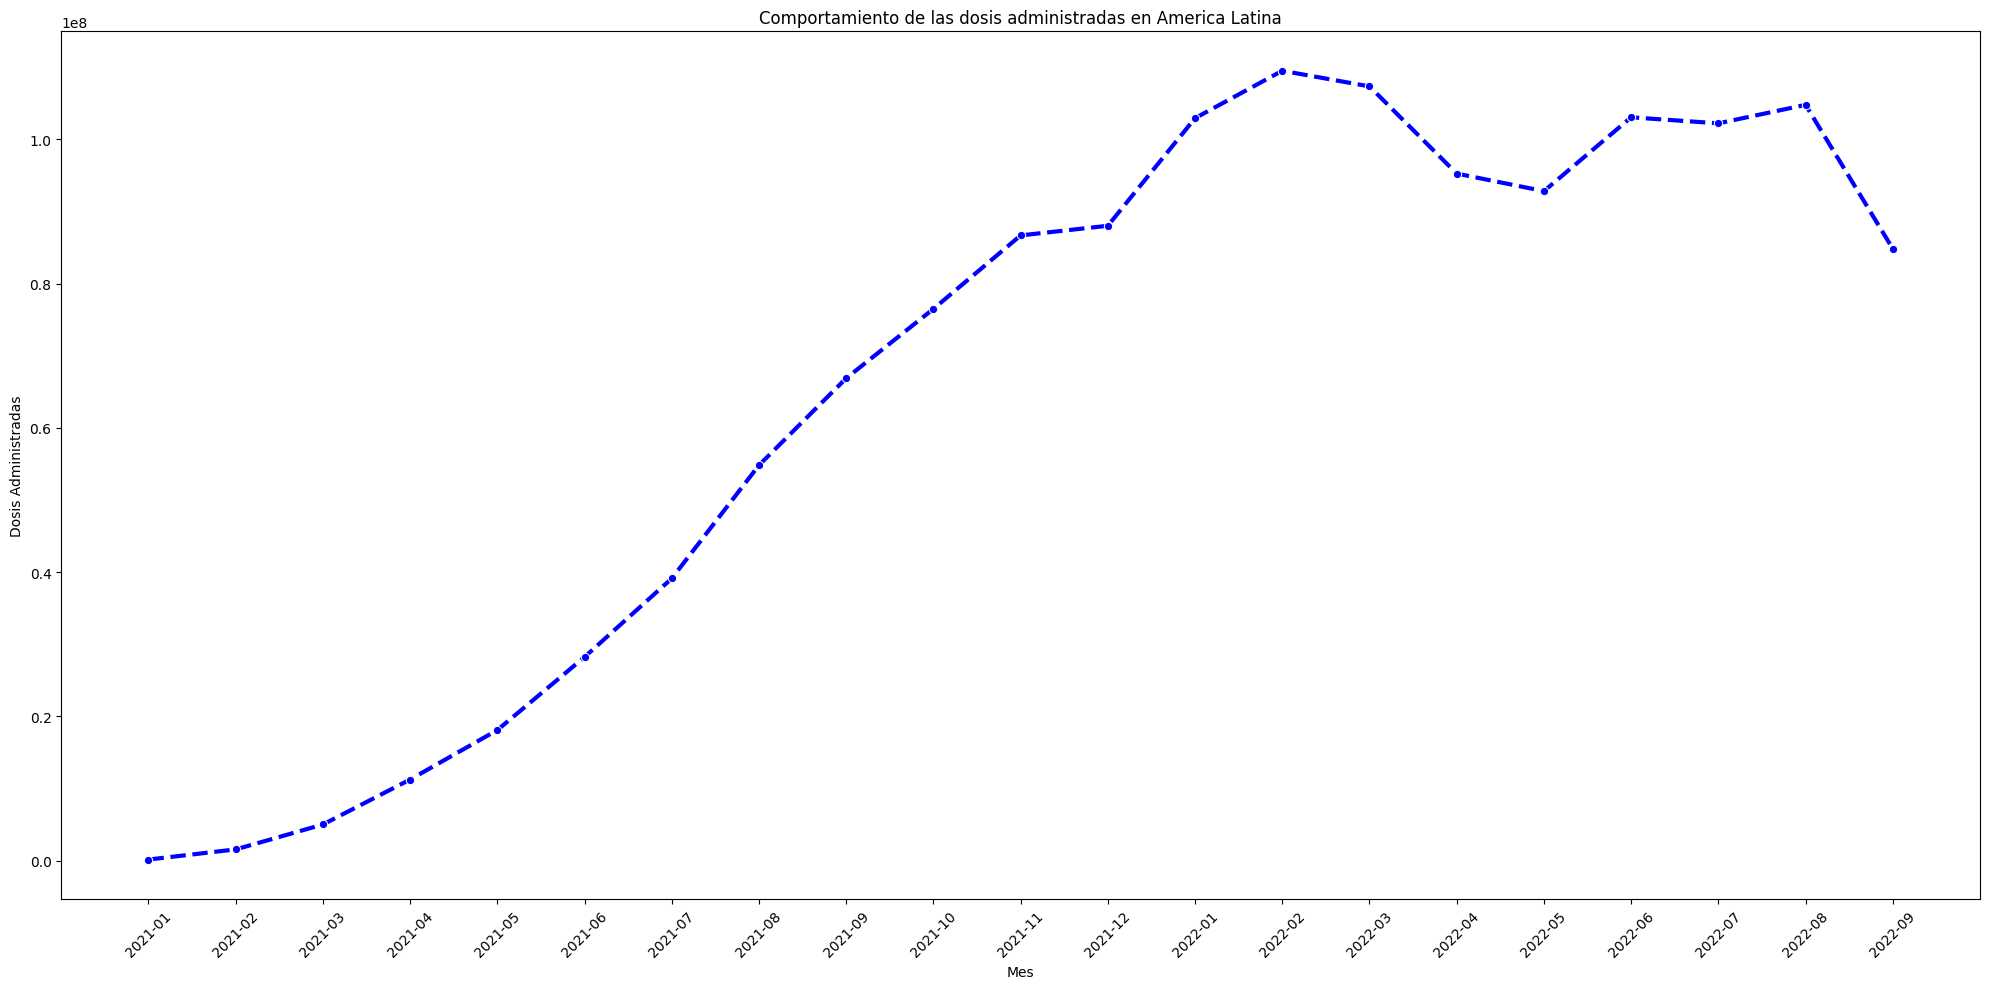

In [40]:
# Extraccion del año y del mes
data_filtrada['año'] = data_filtrada['date'].dt.to_period('Y').astype(str)
data_filtrada['mes'] = data_filtrada['date'].dt.to_period('M').astype(str)

# Creacion de la figura
plt.figure(figsize=(20, 10))

# Calculo de las dosis administradas por mes
dosis_administradas_por_mes = data_filtrada.groupby('mes')['cumulative_vaccine_doses_administered'].mean().reset_index()

# Grafico de lineas para las dosis administardas por mes
sns.lineplot(data=dosis_administradas_por_mes, x='mes', y='cumulative_vaccine_doses_administered', color='blue', marker='o', linewidth= 3, linestyle = "dashed")

# Añadir titulo y etiquetas
plt.title('Comportamiento de las dosis administradas en America Latina')
plt.xlabel('Mes')
plt.ylabel('Dosis Administradas')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### Evolución de dosis administradas por mes de cada país.

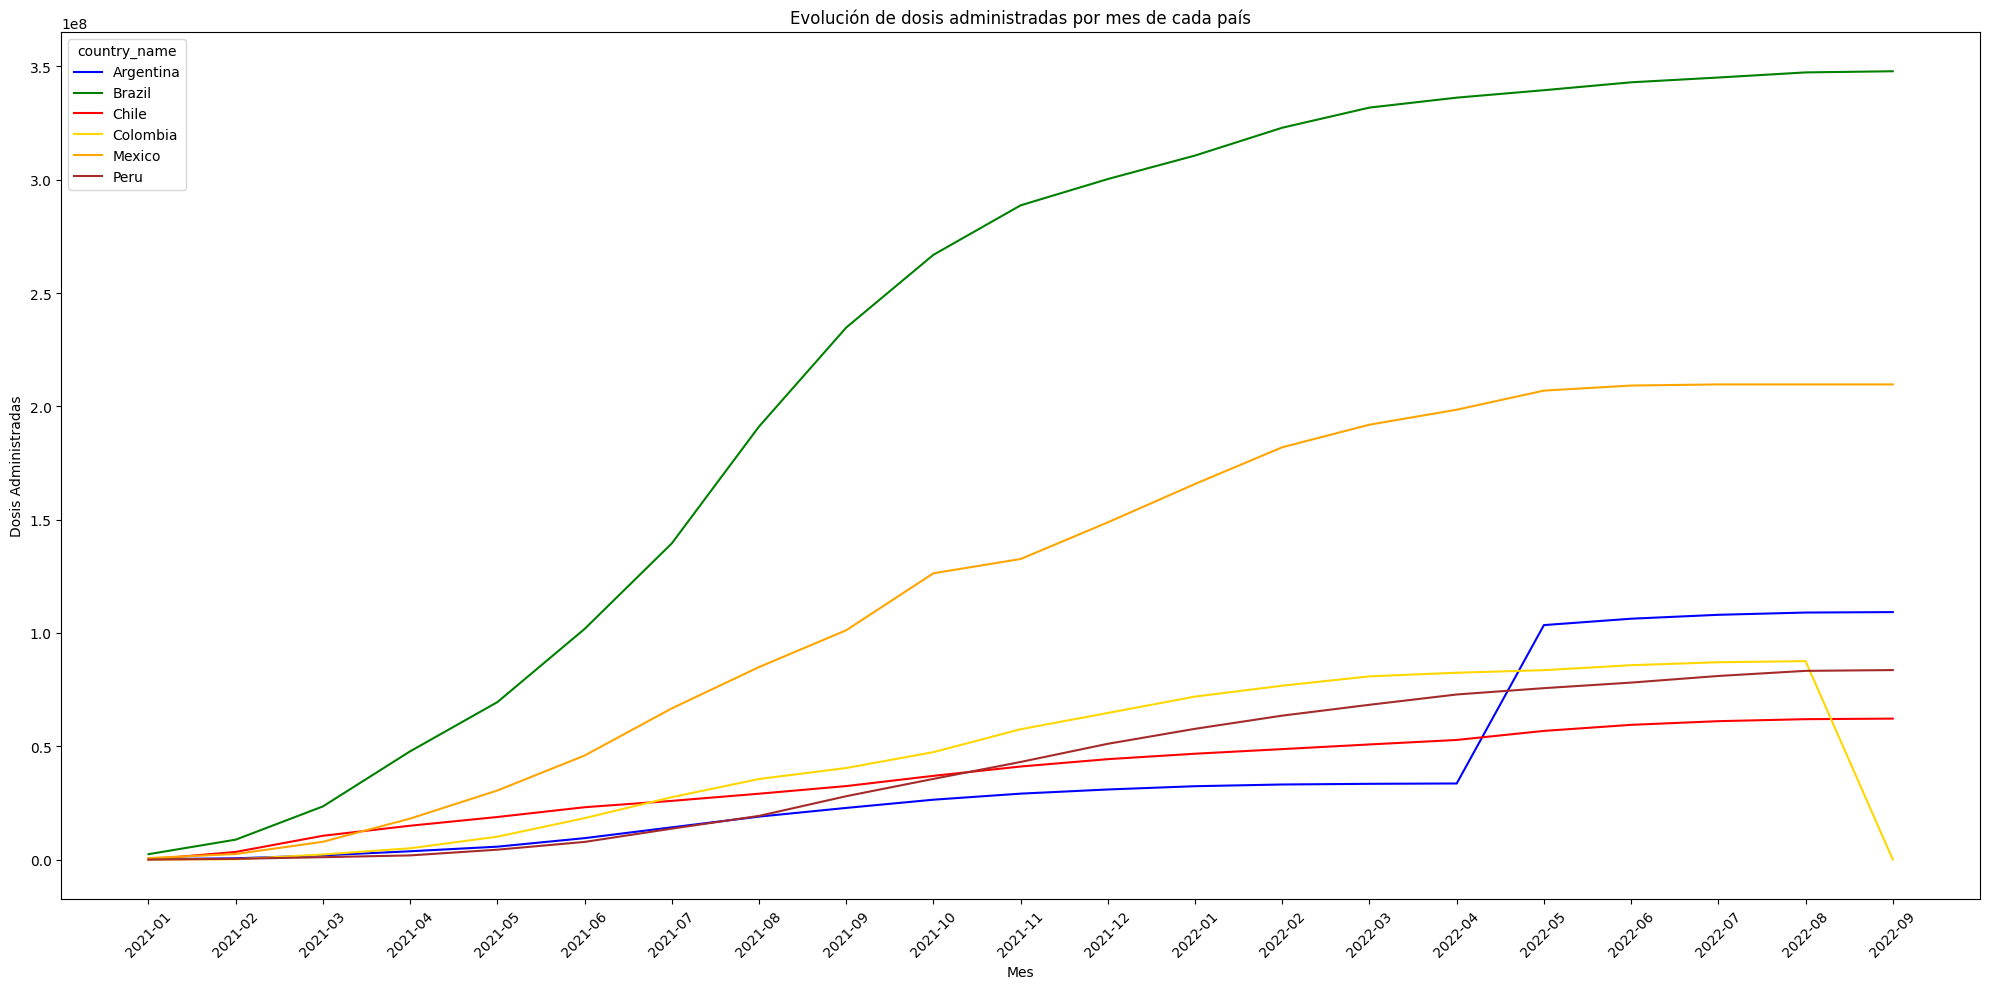

In [41]:
# Evolución de dosis administradas por mes de cada país

# Creacion de la figura
plt.figure(figsize=(20, 10))

# Calculo de las dosis administradas por mes por pais
dosis_administradas_por_mes = data_filtrada.groupby(['mes','country_name'])['cumulative_vaccine_doses_administered'].max().reset_index()

# Grafico de lineas para las dosis administardas por mes por pais
sns.lineplot(data=dosis_administradas_por_mes, x='mes', y='cumulative_vaccine_doses_administered', hue='country_name', linewidth= 1.5, palette=['blue', 'green', 'red', 'gold', 'orange', 'brown'])

# Añadir titulo y etiquetas
plt.title('Evolución de dosis administradas por mes de cada país')
plt.xlabel('Mes')
plt.ylabel('Dosis Administradas')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### Muertes por mes de cada país.

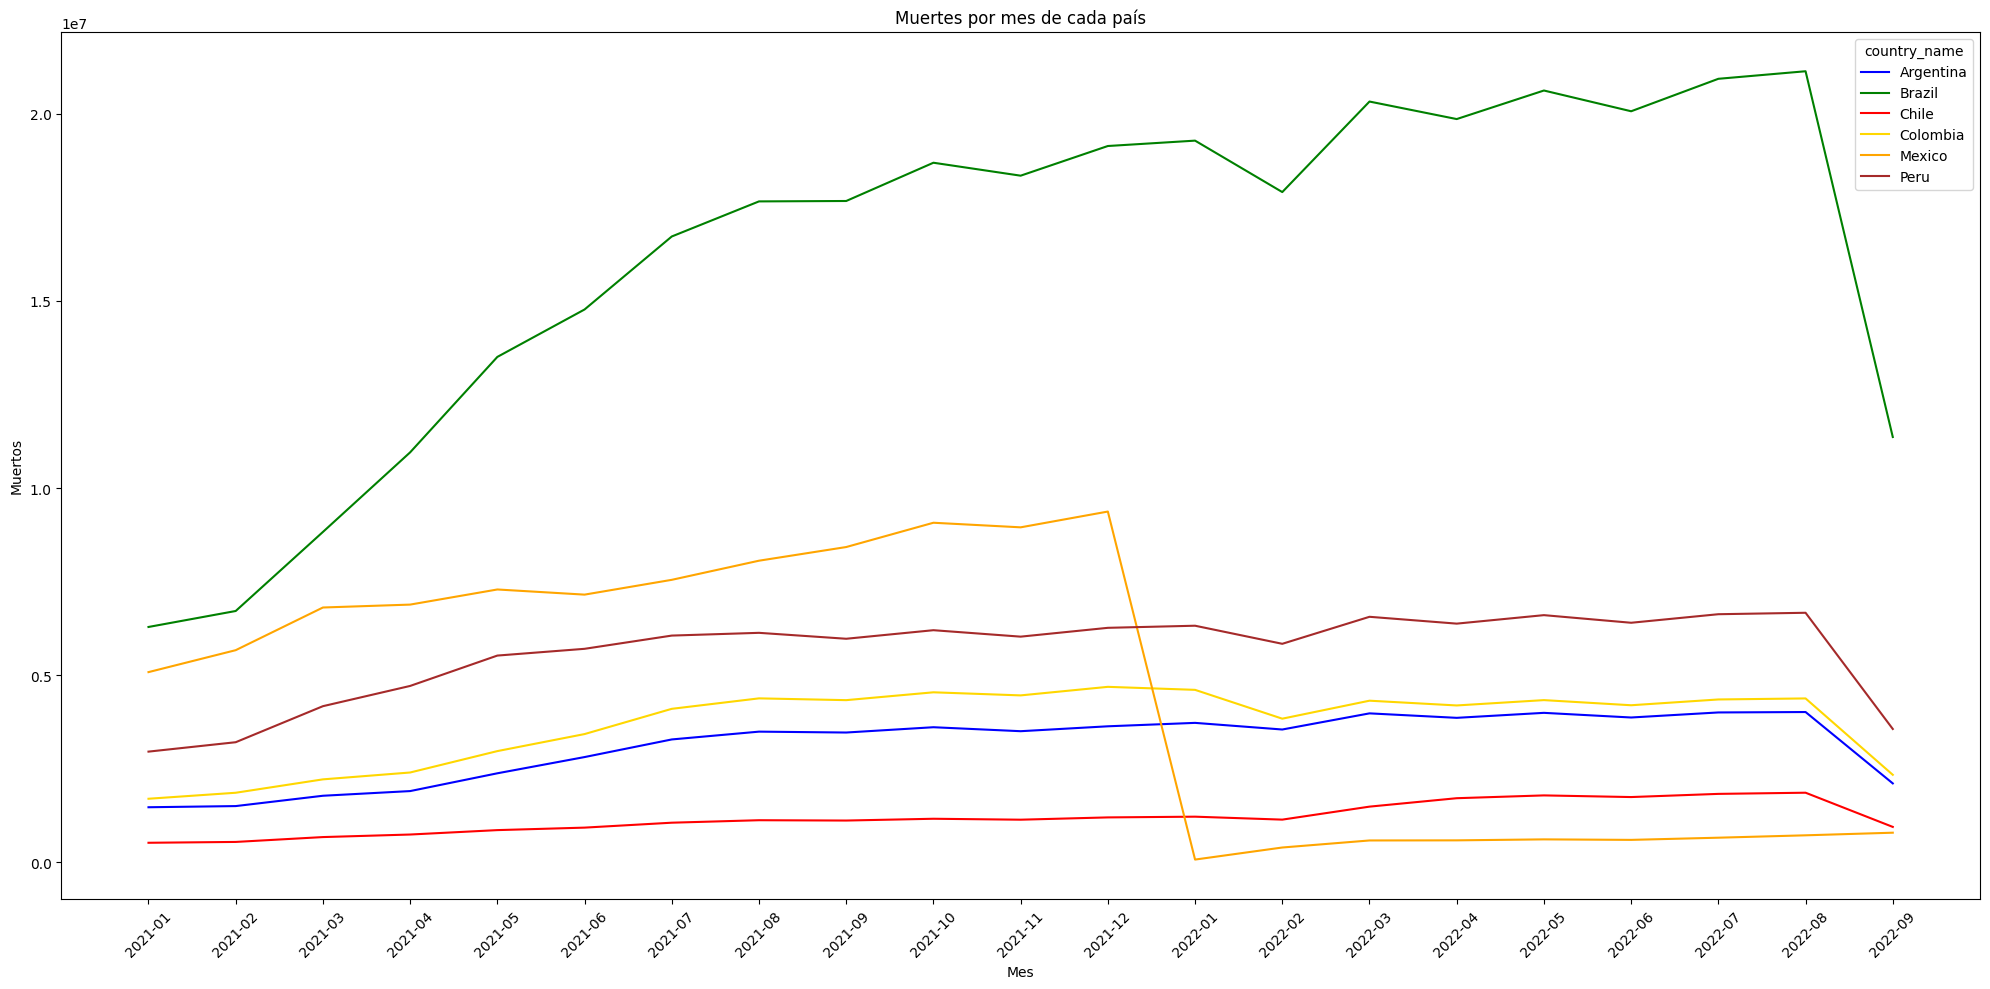

In [42]:
# Muertes por mes de cada país.

# Creacion de la figura
plt.figure(figsize=(20, 10))

# Calculo de las muertes por mes
muertes_por_mes = data_filtrada.groupby(['mes','country_name'])['cumulative_deceased'].sum().reset_index()

# Grafico de lineas de las muertes por mes
sns.lineplot(data=muertes_por_mes, x='mes', y='cumulative_deceased', hue='country_name', linewidth= 1.5, palette=['blue', 'green', 'red', 'gold', 'orange', 'brown'])

# Añadir titulo y etiquetas
plt.title('Muertes por mes de cada país')
plt.xlabel('Mes')
plt.ylabel('Muertos')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


### Casos Confirmados por mes de cada país.

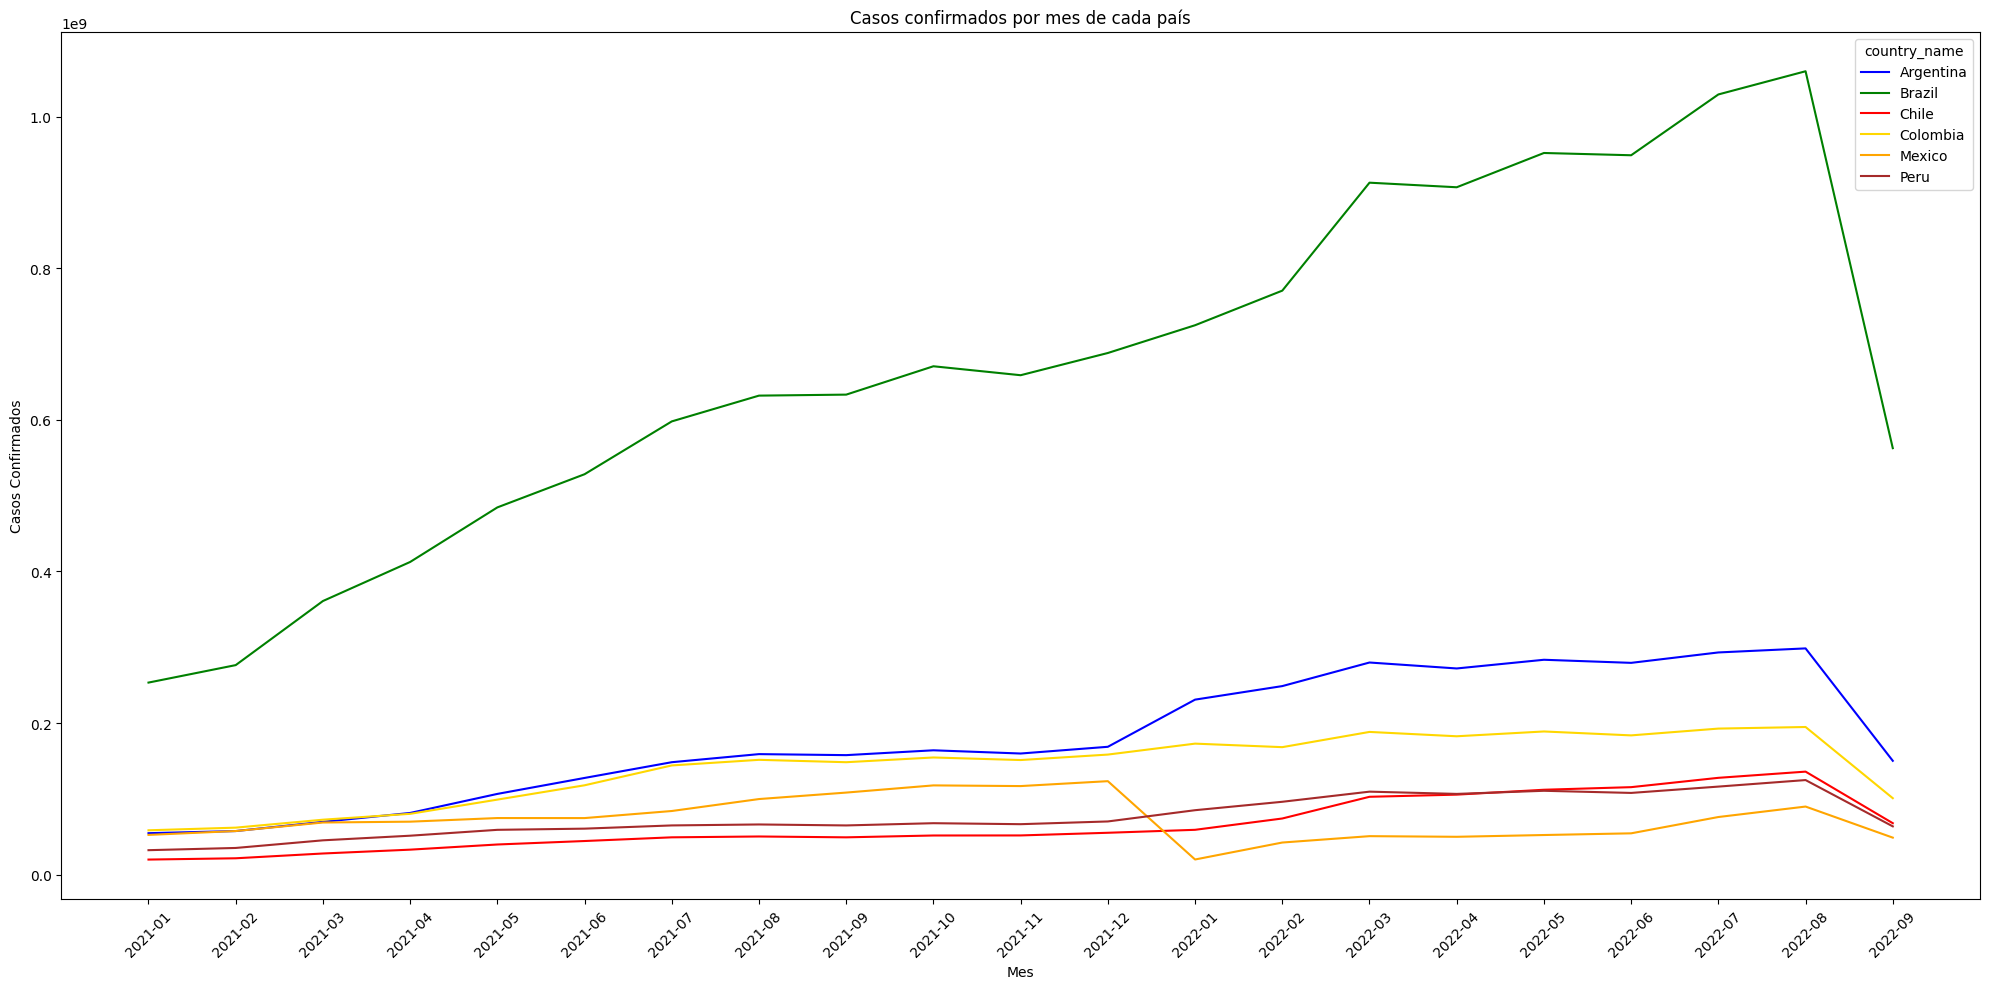

In [43]:
# Casos Confirmados por mes de cada país.

# Creacion de la figura
plt.figure(figsize=(20, 10))

# Calculo de los casos confirmados por mes
casos_confirmados_por_mes = data_filtrada.groupby(['mes','country_name'])['cumulative_confirmed'].sum().reset_index()

# Grafico de lineas para los casos confirmados por mes
sns.lineplot(data=casos_confirmados_por_mes, x='mes', y='cumulative_confirmed', hue='country_name', linewidth= 1.5, palette=['blue', 'green', 'red', 'gold', 'orange', 'brown'])

# Añadir titulo y etiquetas
plt.title('Casos confirmados por mes de cada país')
plt.xlabel('Mes')
plt.ylabel('Casos Confirmados')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


### Recuperados de COVID-19 por mes de cada país.

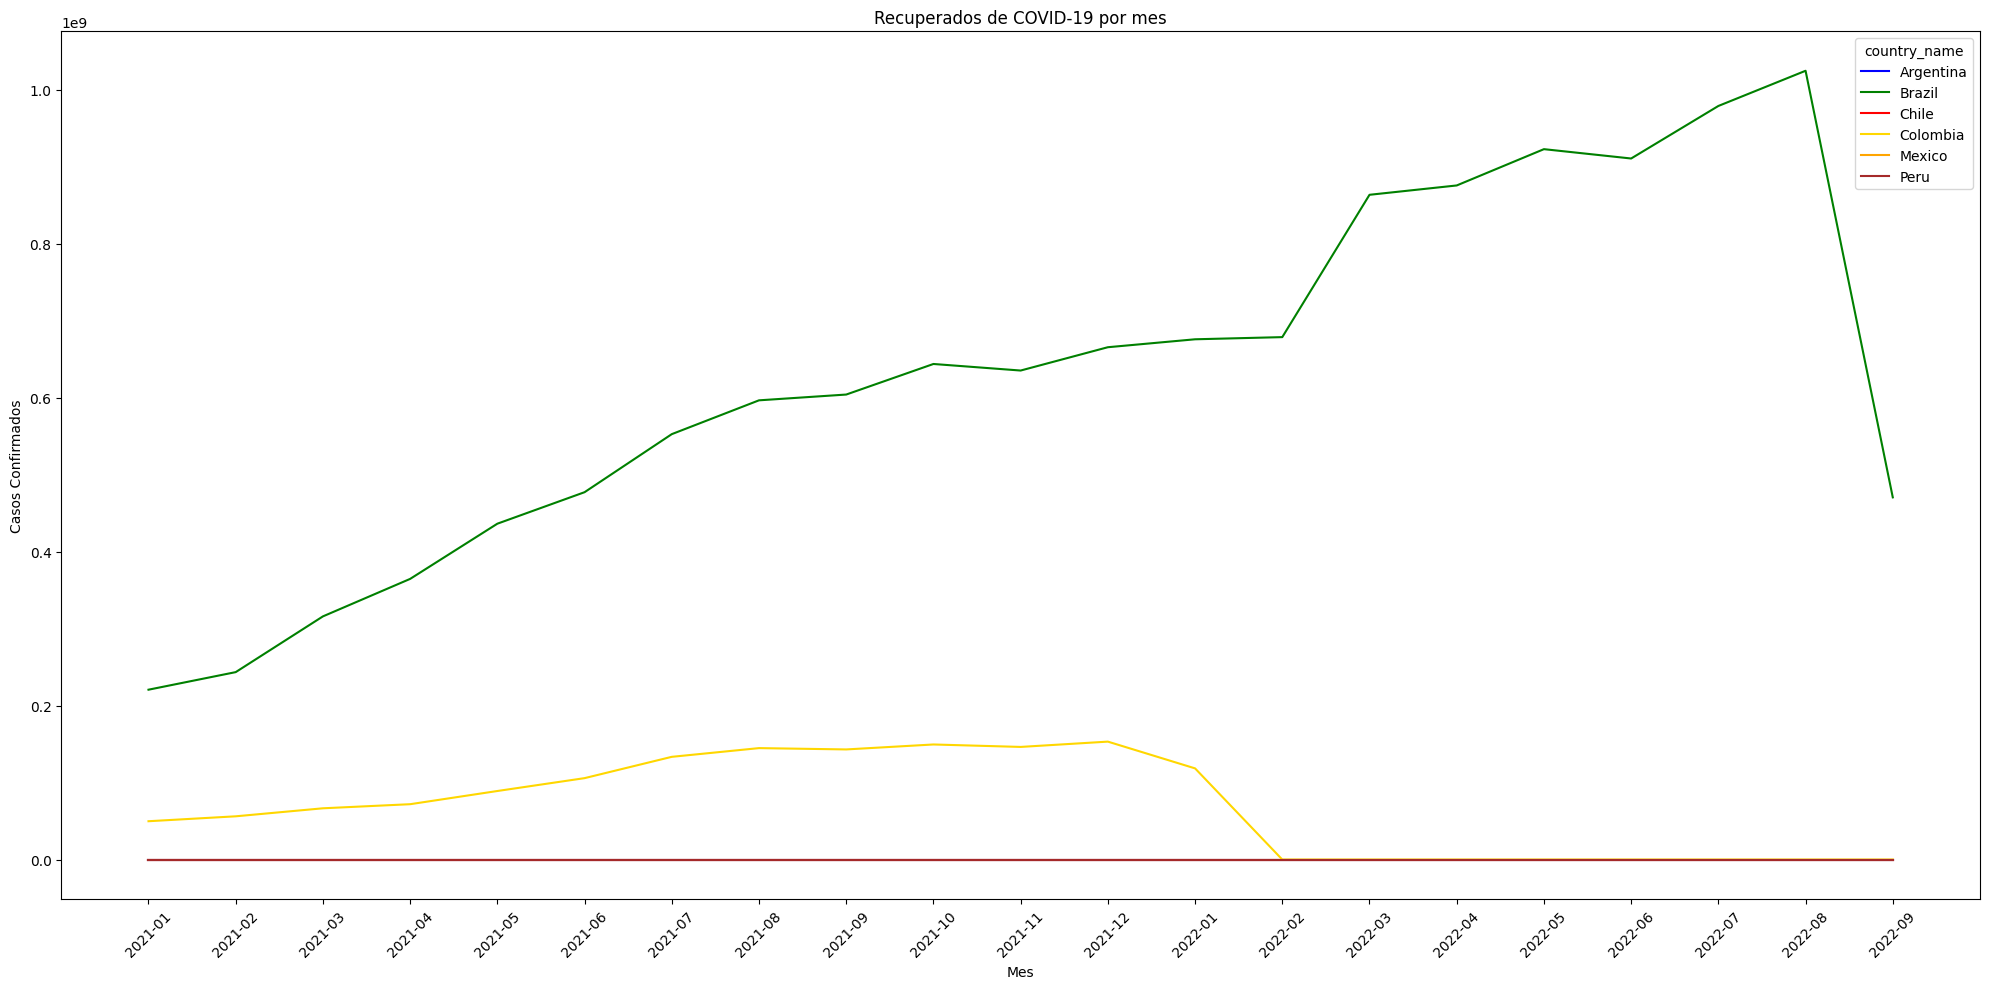

In [44]:
# Recuperados de COVID-19 por mes de cada país.

# Creacion de la figura
plt.figure(figsize=(20, 10))

# Calculo de los recuperados de covid por mes
recuperados_covid_por_mes = data_filtrada.groupby(['mes','country_name'])['cumulative_recovered'].sum().reset_index()

# Grafico de lineas de los recuperados de covid por mes
sns.lineplot(data=recuperados_covid_por_mes, x='mes', y='cumulative_recovered', hue='country_name', linewidth= 1.5, palette=['blue', 'green', 'red', 'gold', 'orange', 'brown'])

# Añadir titulo y etiquetas
plt.title('Recuperados de COVID-19 por mes')
plt.xlabel('Mes')
plt.ylabel('Casos Confirmados')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### Dosis acumuladas por pais.

C:\Users\Agus\AppData\Local\Temp\ipykernel_12652\1267564203.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_filtrada, x='cumulative_vaccine_doses_administered', y='country_name', palette=['blue', 'green', 'red', 'gold', 'orange', 'brown'])


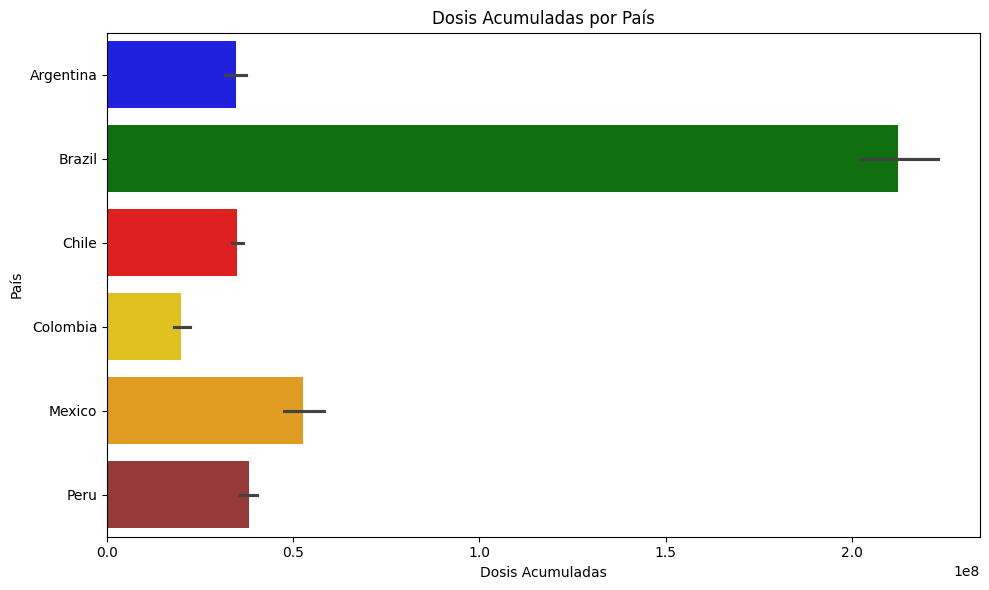

In [45]:
# Dosis acumuladas por pais.

# Creacion de la figura
plt.figure(figsize=(10, 6))

# Grafico de barras de las dosis acumuladas por pais
sns.barplot(data=data_filtrada, x='cumulative_vaccine_doses_administered', y='country_name', palette=['blue', 'green', 'red', 'gold', 'orange', 'brown'])

# Añadir titulo y etiquetas
plt.title('Dosis Acumuladas por País')
plt.xlabel('Dosis Acumuladas')
plt.ylabel('País')
plt.tight_layout()


plt.show()

### Temperatura Media de cada pais.

C:\Users\Agus\AppData\Local\Temp\ipykernel_12652\2657497399.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_filtrada, x='country_name', y='average_temperature_celsius', palette=['blue', 'green', 'red', 'gold', 'orange', 'brown'])


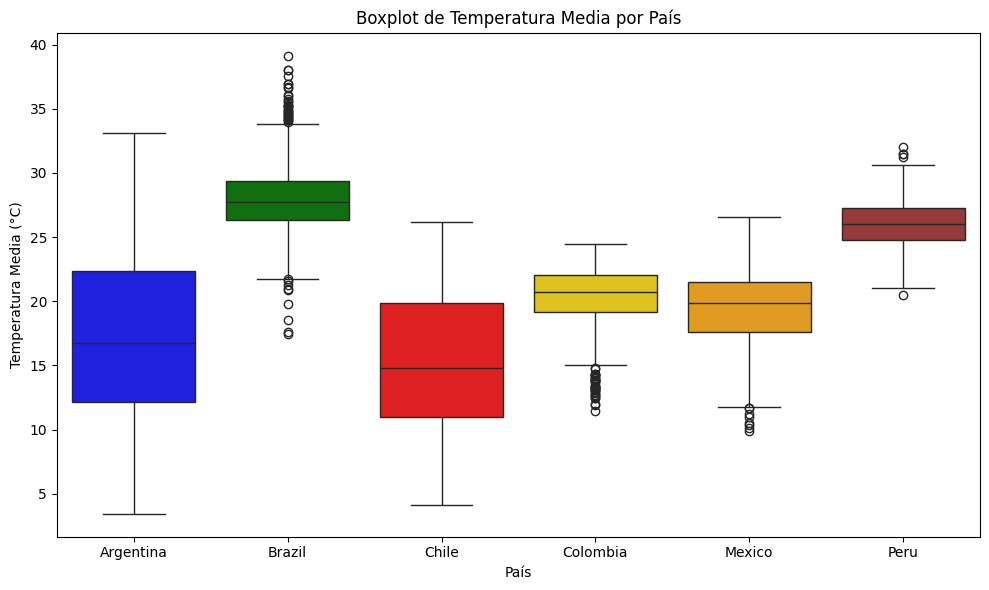

In [46]:

# Temperatura Media de cada pais

# Grafico de caja de la temperatura media por pais
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_filtrada, x='country_name', y='average_temperature_celsius', palette=['blue', 'green', 'red', 'gold', 'orange', 'brown'])

# Añadir titulo y etiquetas
plt.title('Boxplot de Temperatura Media por País')
plt.xlabel('País')
plt.ylabel('Temperatura Media (°C)')
plt.tight_layout()

plt.show()


### Distribución de la población de America Latina por grupos de edad.

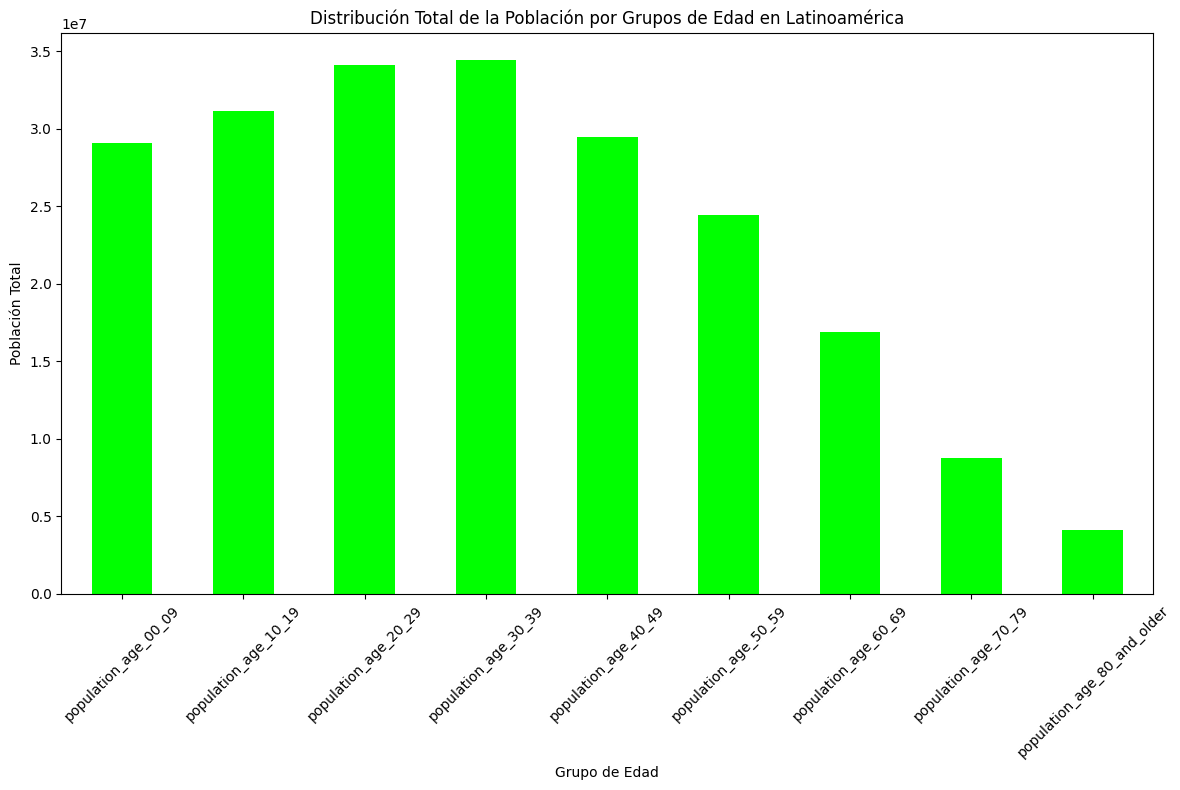

In [47]:
# Distribución de la población por grupos de edad.

# Sumar la población en cada grupo de edad para todos los países
total_poblacion_por_edad = data_filtrada[variables_grupo_edad].max()

# Creacion de la figura
plt.figure(figsize=(12, 8))

# Grafico de barras de la distribucion de la poblacion de America Latina por grupos de edad
total_poblacion_por_edad.plot(kind='bar', color='lime')

# Añadir titulo y etiquetas
plt.title('Distribución Total de la Población por Grupos de Edad en Latinoamérica')
plt.xlabel('Grupo de Edad')
plt.ylabel('Población Total')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### Metricas Covid-19

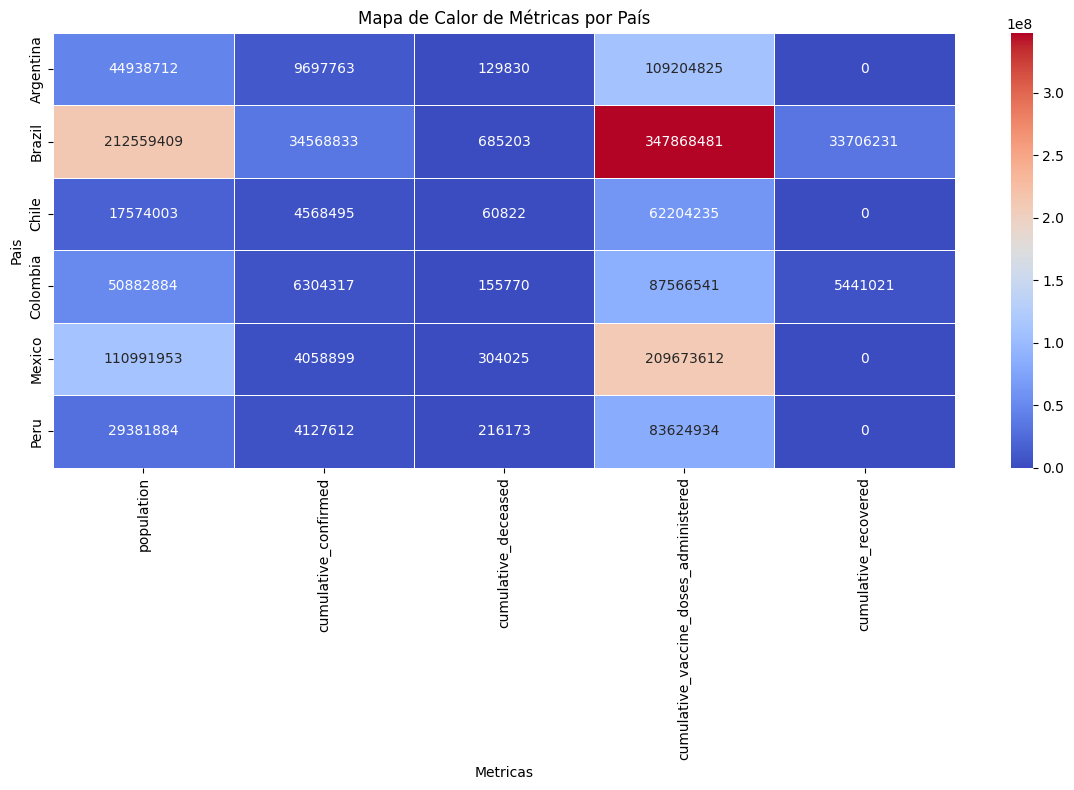

In [48]:

# Metricas por pais
metricas_por_pais = ['population', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered', 'cumulative_recovered']

# Calculo de las metricas del covid por pais
data_metricas_por_pais = data_filtrada.groupby('country_name')[metricas_por_pais].max().reset_index()

# Creacion de la figura
plt.figure(figsize=(12, 8))

# Mapa de calor de las metricas del covid por pais
sns.heatmap(data_metricas_por_pais.set_index('country_name'), annot=True, cmap='coolwarm', fmt='.0f', linewidths=.5)
# Añadir titulo y etiquetas
plt.title('Mapa de Calor de Métricas por País')
plt.xlabel('Metricas')
plt.ylabel('Pais')

plt.tight_layout()
plt.show()


### Diagrama de barras apilado de comparación de la tasa de mortalidad masculina vs. femenina por país.

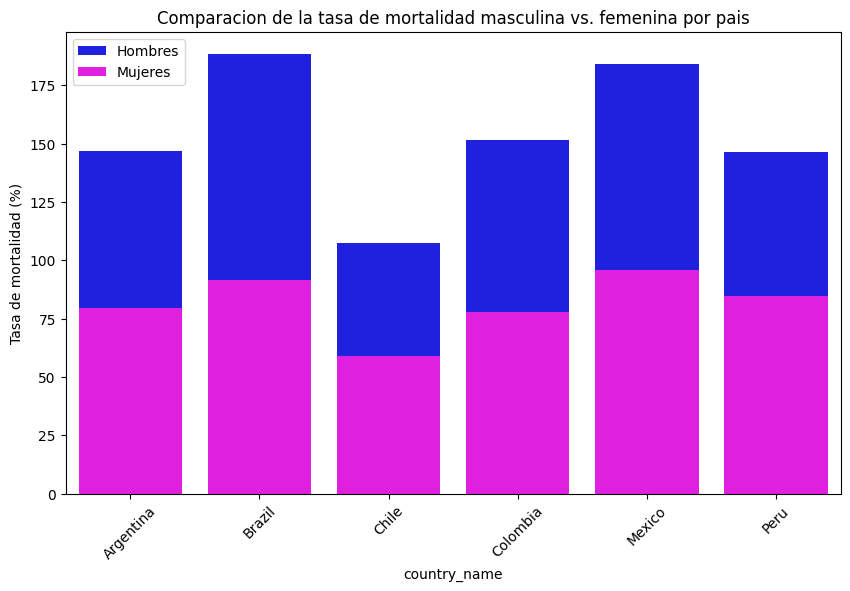

In [49]:
# Diagrama de barras apilado de comparación de la tasa de mortalidad masculina vs. femenina por país.

plt.figure(figsize=(10, 6))

sns.barplot(data=data_filtrada, x='country_name', y='adult_male_mortality_rate', color='blue', label='Hombres')
sns.barplot(data=data_filtrada, x='country_name', y='adult_female_mortality_rate', color='fuchsia', label='Mujeres')
plt.xticks(rotation=45)
plt.ylabel('Tasa de mortalidad (%)')
plt.title('Comparacion de la tasa de mortalidad masculina vs. femenina por pais')
plt.legend(loc='upper left')
plt.show()

### Matriz de correlación de indicadores demográficos y de salud.

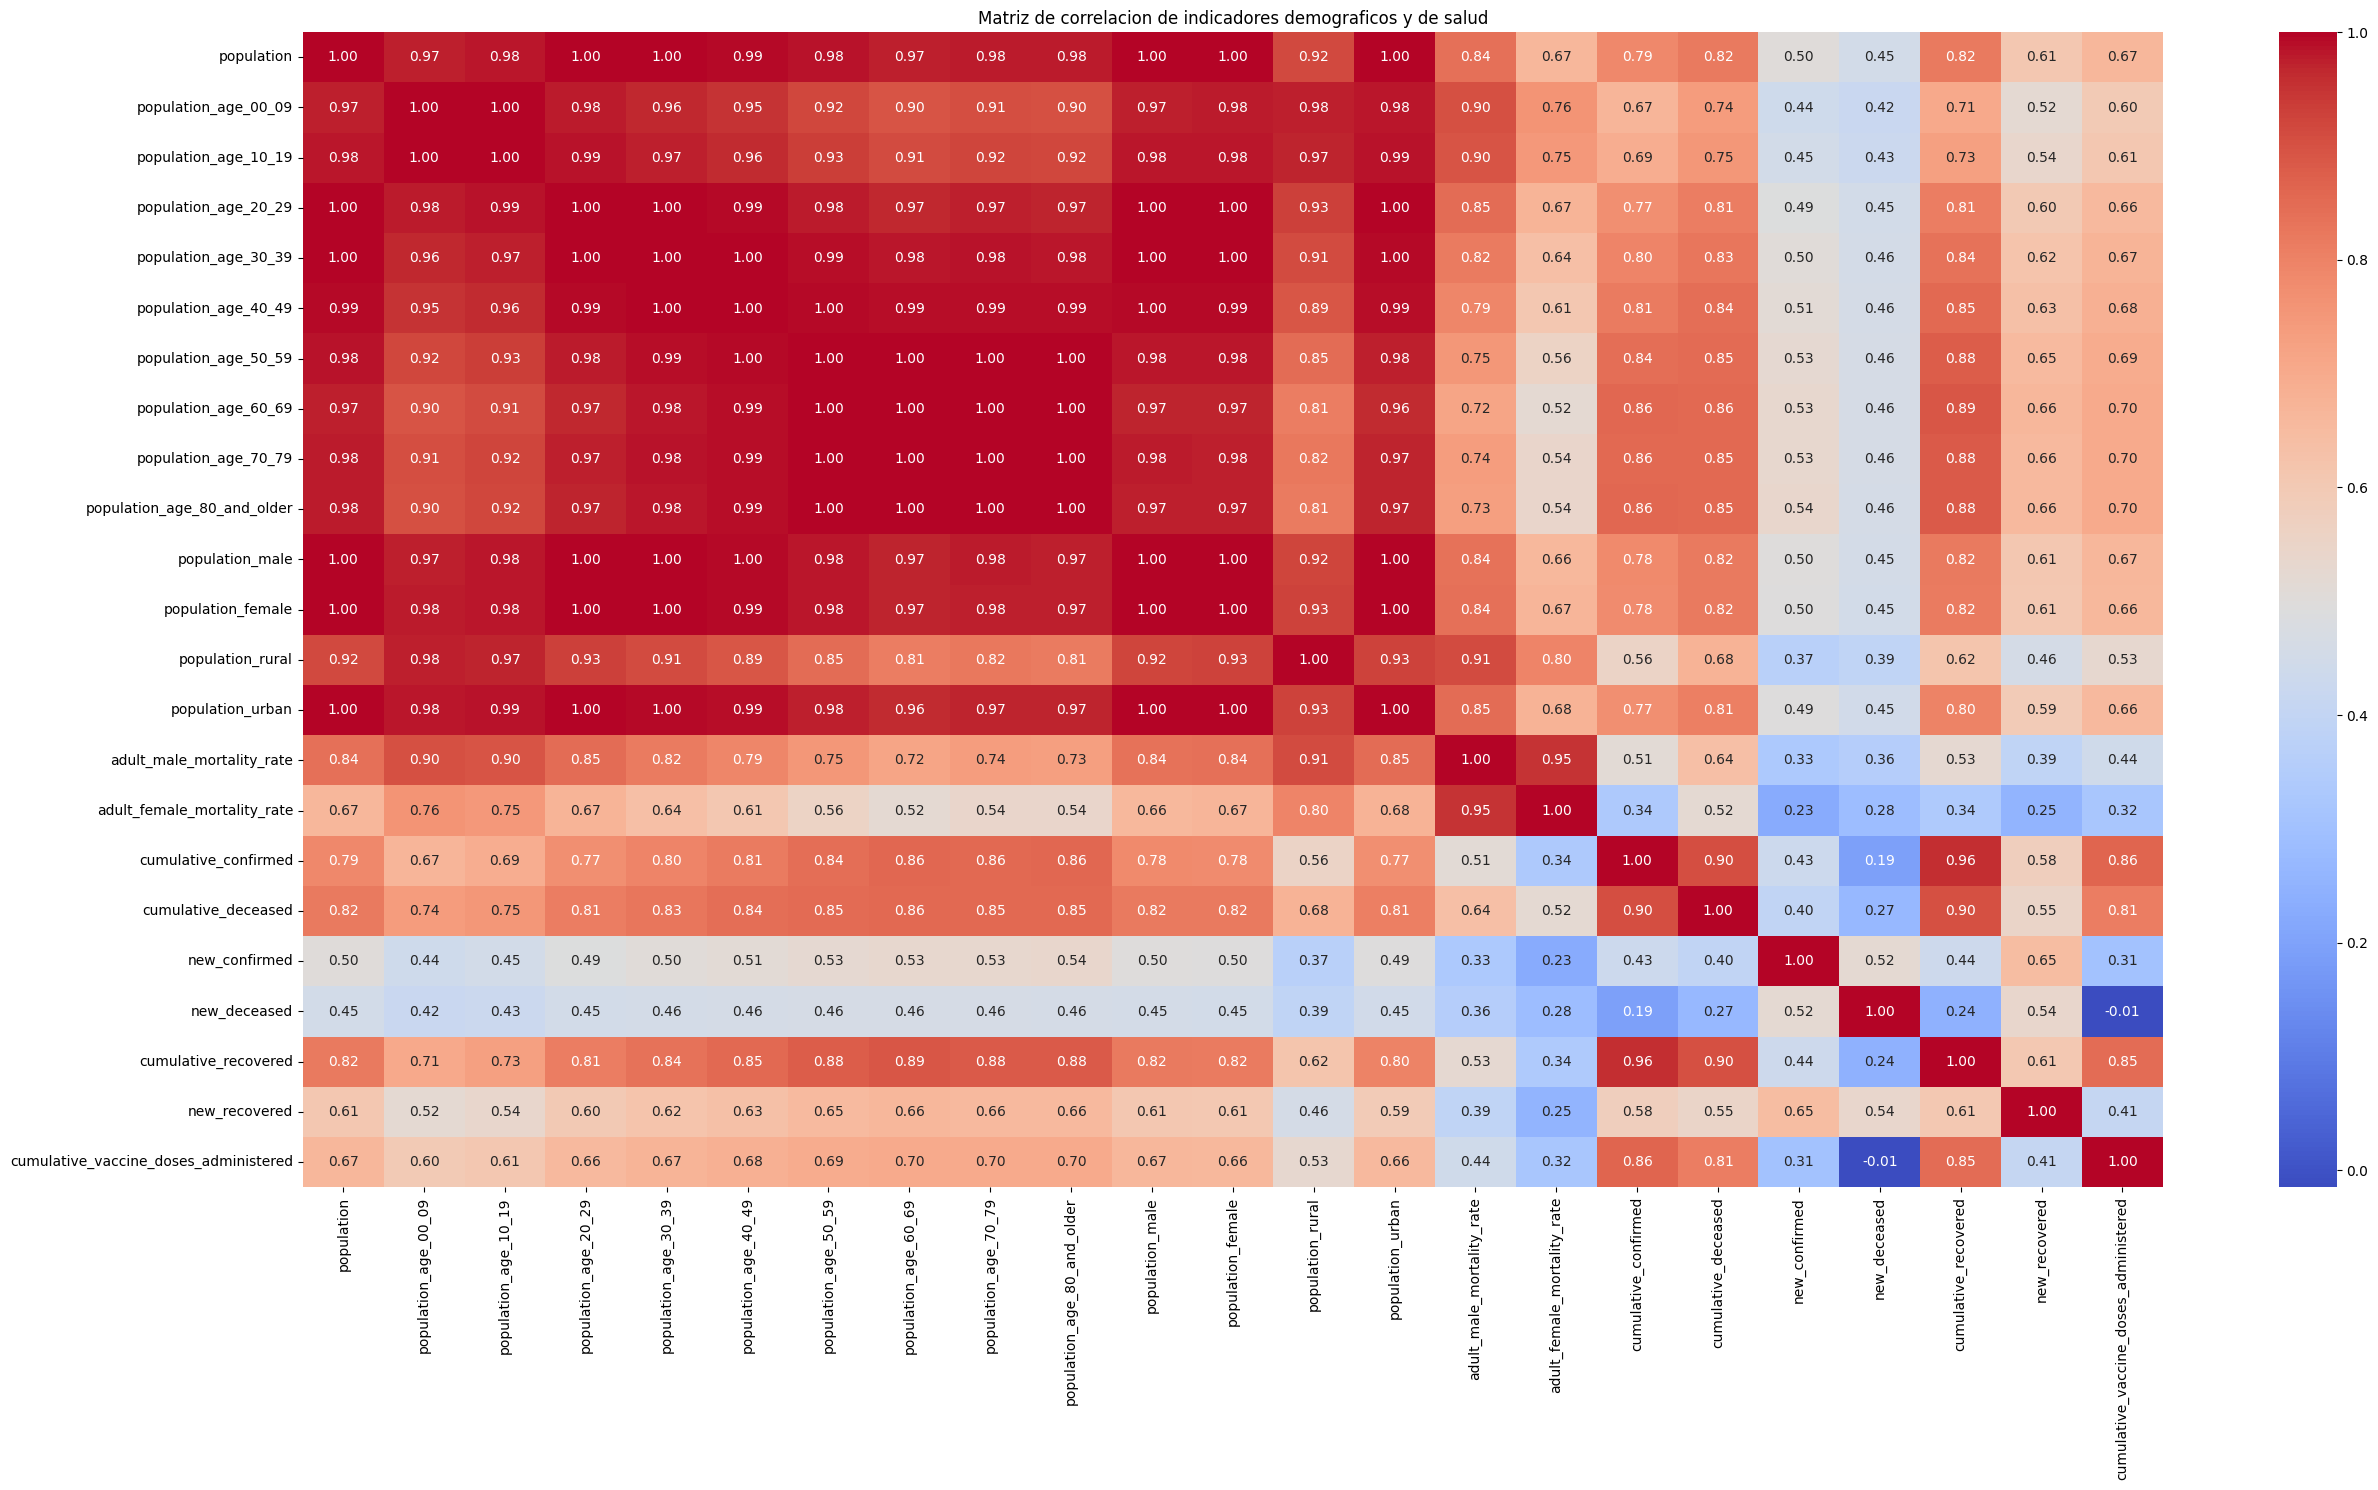

In [50]:
# Agrupación por Demografía
variables_demograficas_x_salud = [
    'population',
    'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
    'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
    'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older',
    'population_male', 'population_female',
    'population_rural', 'population_urban','adult_male_mortality_rate', 'adult_female_mortality_rate',
    'cumulative_confirmed', 'cumulative_deceased', 'new_confirmed', 'new_deceased',
    'cumulative_recovered', 'new_recovered',
    'cumulative_vaccine_doses_administered'
]

# Creacion de la correlacion demografia x salud
demografia_salud = data_filtrada[variables_demograficas_x_salud]
correlacion_demografia_salud = demografia_salud.corr()

plt.figure(figsize=(30, 15))
# Mapa de calor de la matriz de correlacion entre los grupos de edad y las variables relacionadas al covid
sns.heatmap(data=correlacion_demografia_salud, annot=True, cmap='coolwarm', fmt='.2f' )

# Añadir titulo
plt.title('Matriz de correlacion de indicadores demograficos y de salud')

plt.show()

### Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad.

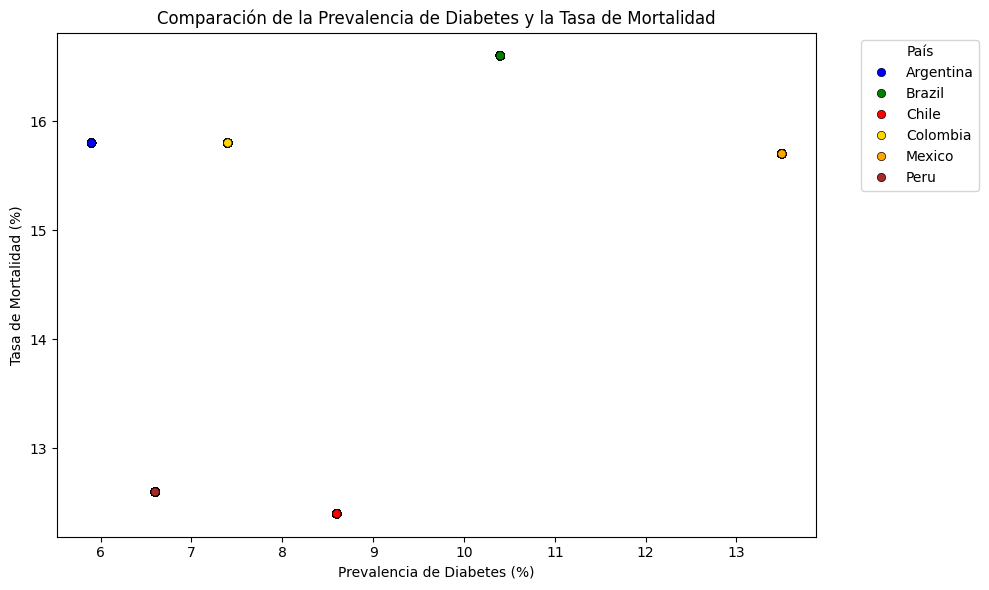

In [51]:
# Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad.

# Creacion de la figura
plt.figure(figsize=(10, 6))

# Crear el diagrama de dispersión
sns.scatterplot(data=data_filtrada, x='diabetes_prevalence', y='comorbidity_mortality_rate', hue='country_name', edgecolor='black', palette=['blue', 'green', 'red', 'gold', 'orange', 'brown'])

# Añadir titulo y etiquetas
plt.title('Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad')
plt.xlabel('Prevalencia de Diabetes (%)')
plt.ylabel('Tasa de Mortalidad (%)')
plt.legend(title='País', bbox_to_anchor=(1.05, 1))
plt.tight_layout()

plt.show()

# Avance 3

## Analisis explotario de los datos

### Identificaremos la tendencia de la evolucion del covid-19 en el año central de la pandemia, que fue el año 2021.

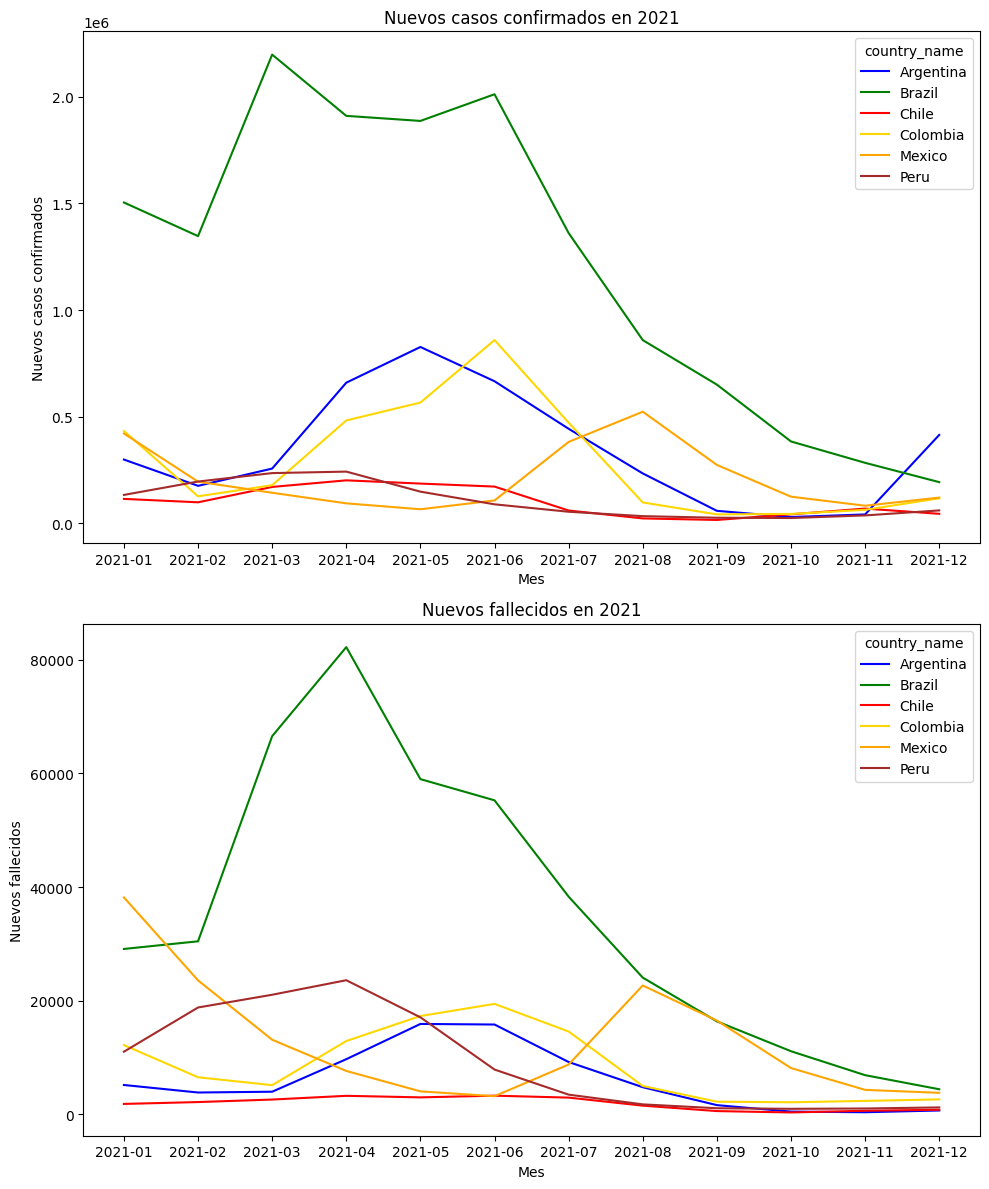

In [52]:
# Filtrar el dataframe solo por el año 2021
data_filtrada_2021=data_filtrada[(data_filtrada['date'] >= '2021-01-01') & (data_filtrada['date'] <= '2021-12-31')]

# Calculo para medir la evolucion del covid en los distintos
casos_2021 = data_filtrada_2021.groupby(['country_name', 'mes'])[['new_confirmed', 'new_deceased']].sum().reset_index()

# Definir la paleta de colores
paleta_colores=['blue', 'green', 'red', 'gold', 'orange', 'brown']

# Aplicar la paleta a un gráfico de Seaborn
sns.set_palette(paleta_colores)

# Creacion de la figura
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(10,12))

# Gráfico de nuevos casos confirmados
sns.lineplot(data=casos_2021, x='mes', y='new_confirmed', hue='country_name', ax=ax[0])
ax[0].set_title('Nuevos casos confirmados en 2021')
ax[0].set_xlabel('Mes')
ax[0].set_ylabel('Nuevos casos confirmados')

# Gráfico de nuevos fallecidos
sns.lineplot(data=casos_2021, x='mes', y='new_deceased', hue='country_name', ax=ax[1])
ax[1].set_title('Nuevos fallecidos en 2021')
ax[1].set_xlabel('Mes')
ax[1].set_ylabel('Nuevos fallecidos')

plt.tight_layout()
plt.show()


### Tambien podemos verlo por Trimestres

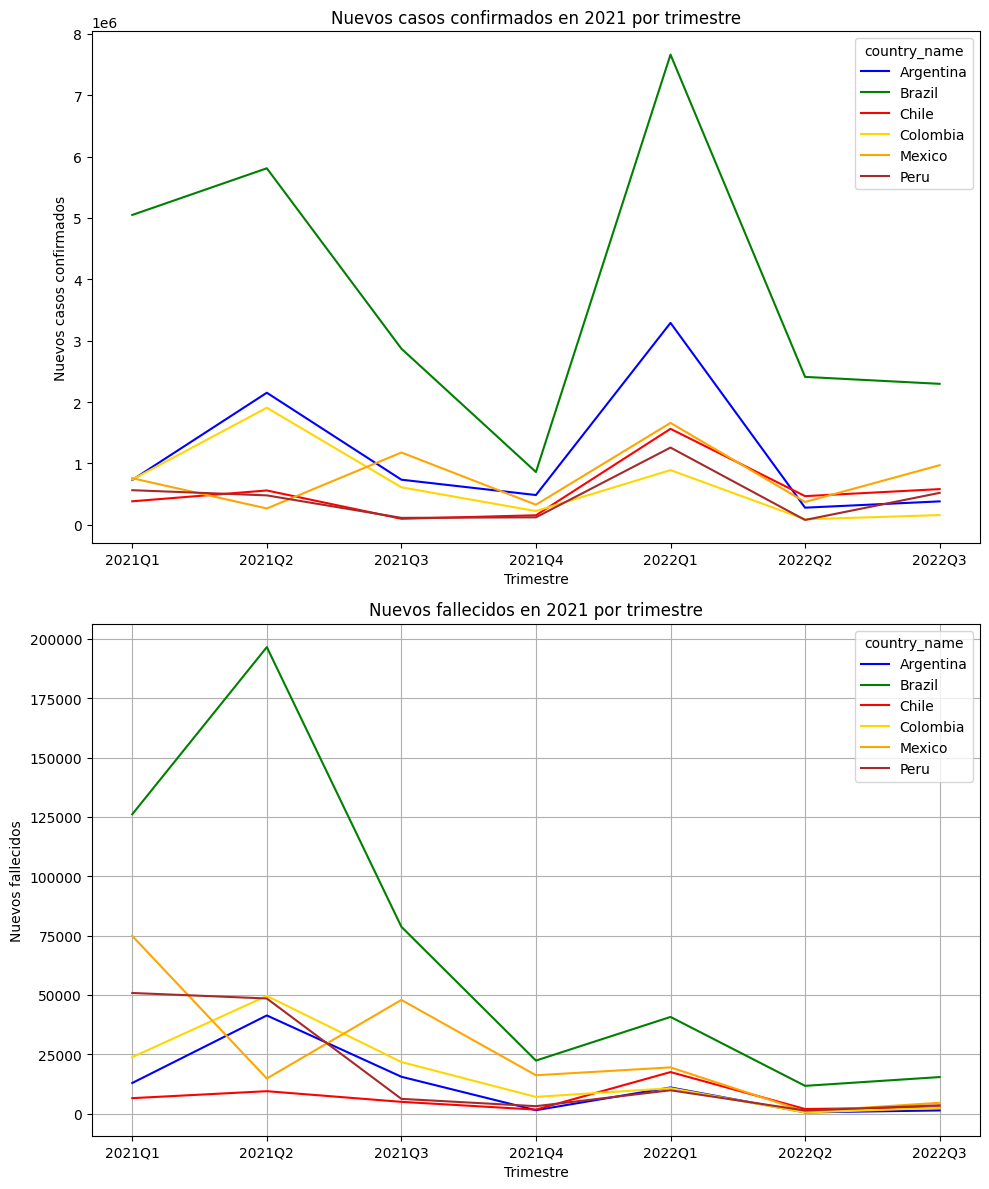

In [53]:
# Crear la columna de trimestre
data_filtrada['trimestre'] = pd.to_datetime(data_filtrada['date']).dt.to_period('Q').astype(str)

# Agrupar los datos por país y trimestre
casos_2021_trimestres = data_filtrada.groupby(['country_name', 'trimestre'])[['new_confirmed', 'new_deceased']].sum().reset_index()

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(10,12))

# Gráfico de nuevos casos confirmados por trimestre
sns.lineplot(data=casos_2021_trimestres, x='trimestre', y='new_confirmed', hue='country_name', ax=ax[0])
ax[0].set_title('Nuevos casos confirmados en 2021 por trimestre')
ax[0].set_xlabel('Trimestre')
ax[0].set_ylabel('Nuevos casos confirmados')

# Gráfico de nuevos fallecidos por trimestre
sns.lineplot(data=casos_2021_trimestres, x='trimestre', y='new_deceased', hue='country_name', ax=ax[1])
ax[1].set_title('Nuevos fallecidos en 2021 por trimestre')
ax[1].set_xlabel('Trimestre')
ax[1].set_ylabel('Nuevos fallecidos')

plt.grid(True)
plt.tight_layout()
plt.show()


### Casos Activos VS Recuperados en America Latina y por pais


#### Conversion de la columna date a indice

In [54]:
# Paso la columna date a indice para poder usar resalmple
data_filtrada.set_index('date', inplace=True)

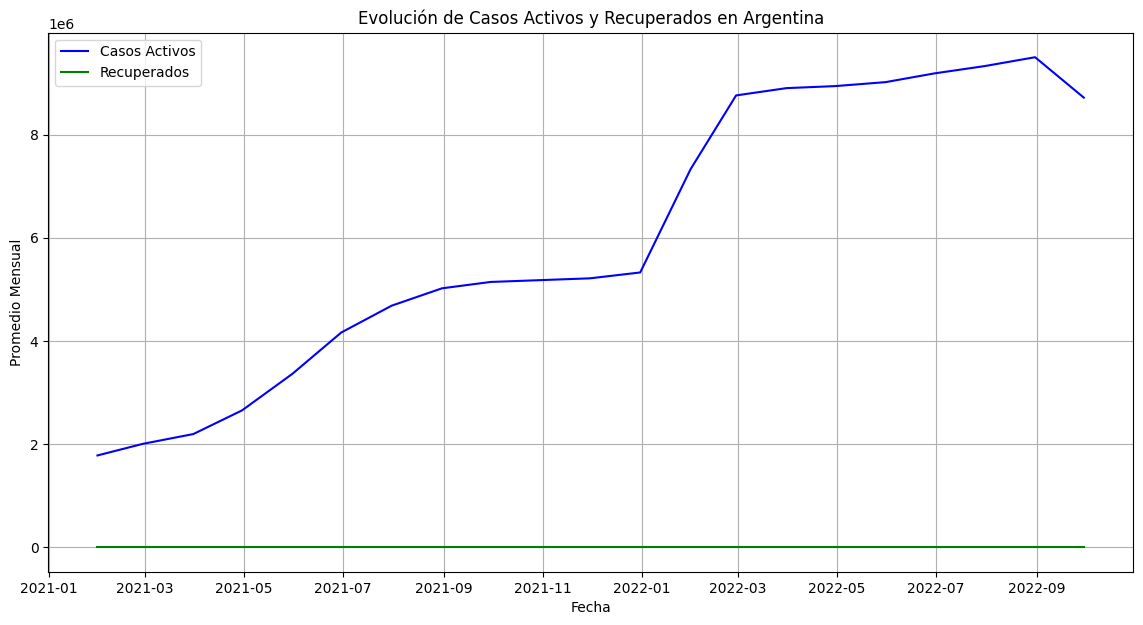

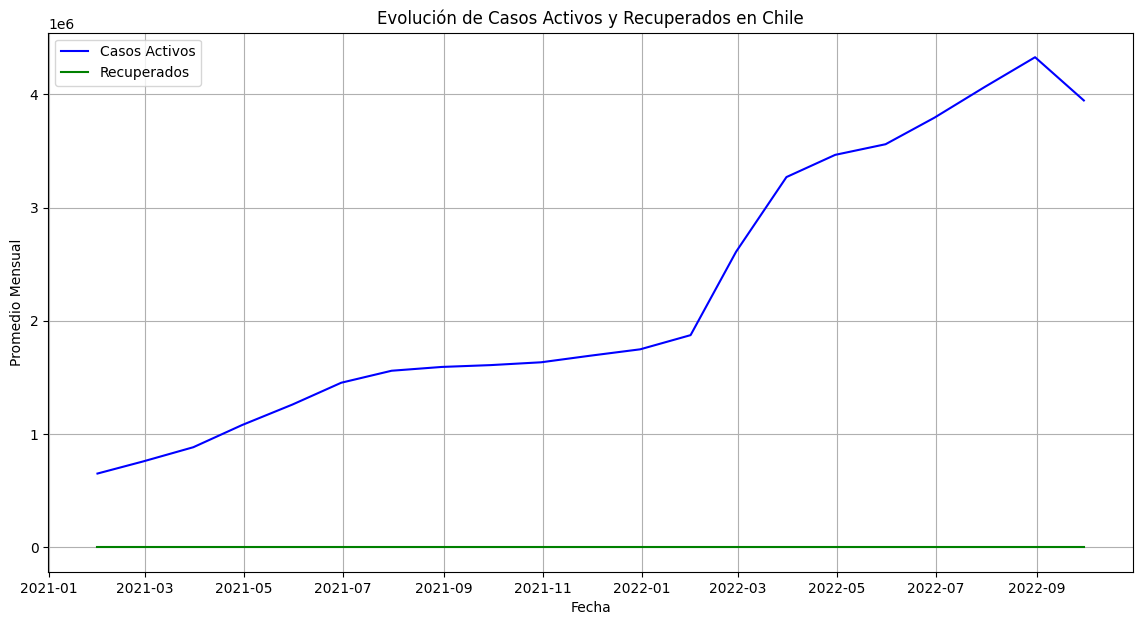

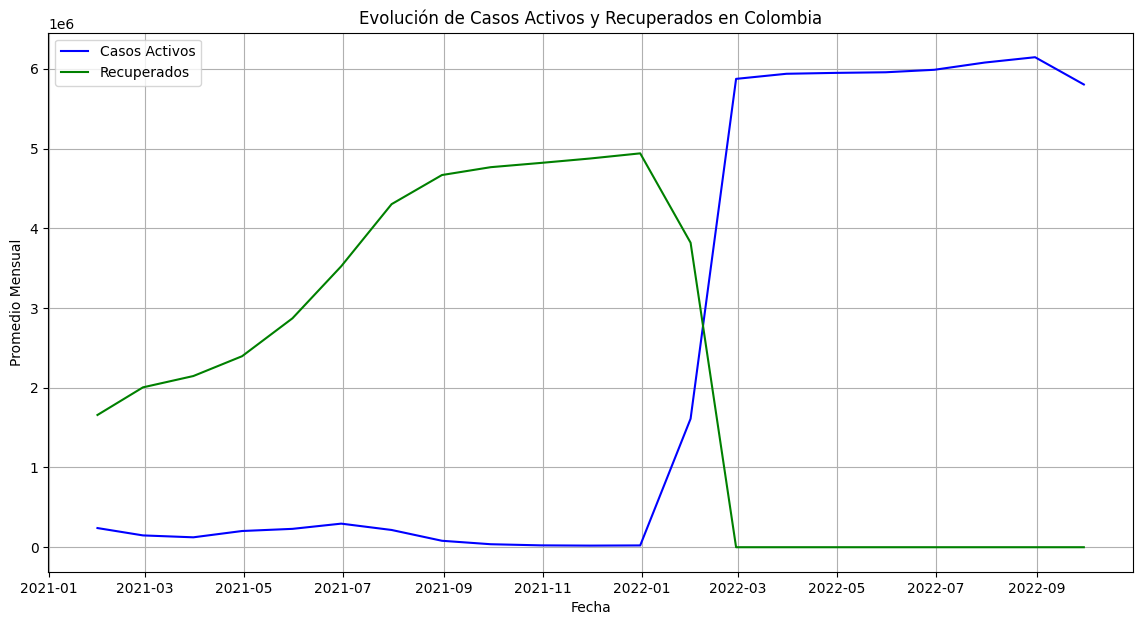

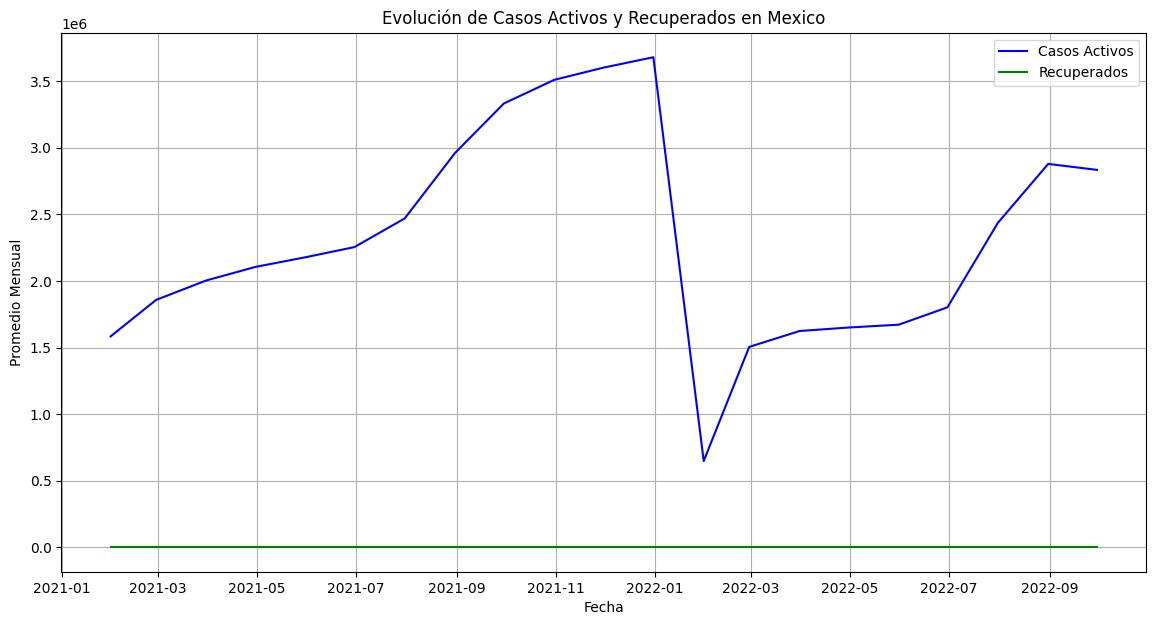

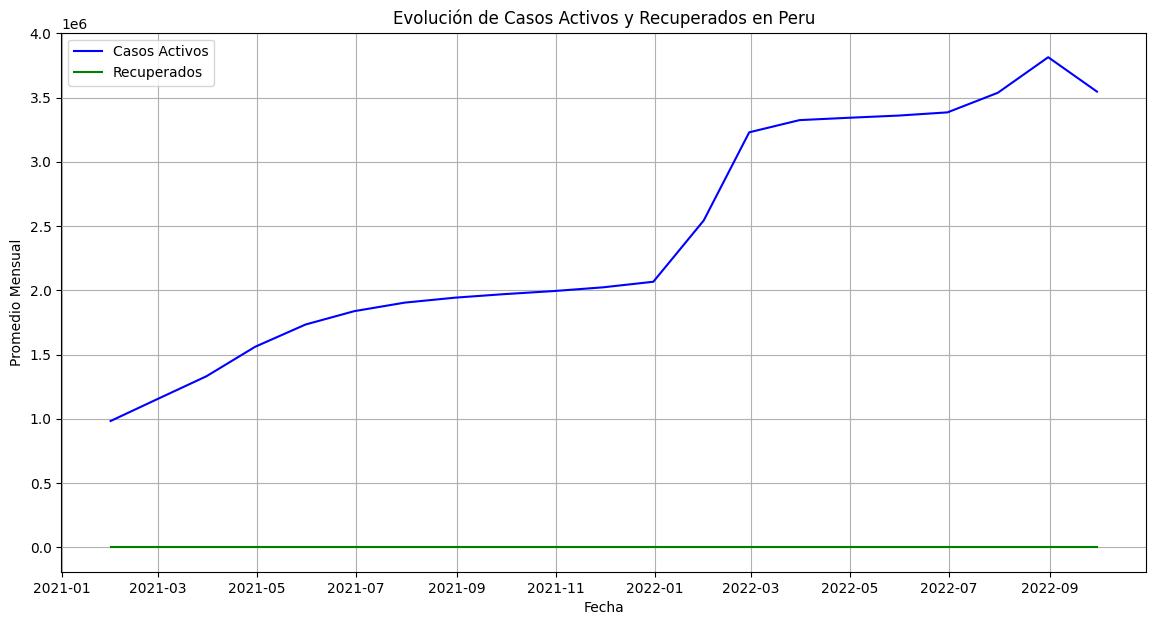

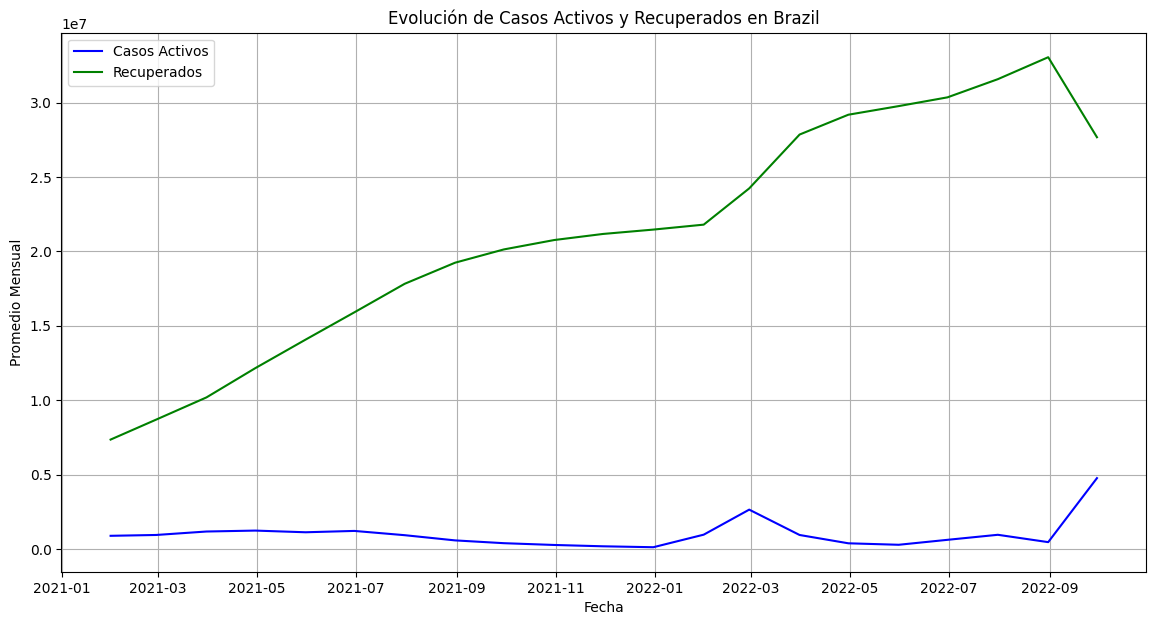

In [55]:
# Calcular casos activos
data_filtrada['casos_activos'] = data_filtrada['cumulative_confirmed'] - data_filtrada['cumulative_deceased'] - data_filtrada['cumulative_recovered']

# Resamplear y calcular el promedio mensual
promedio_casos_activos = data_filtrada.resample('ME')['casos_activos'].mean().reset_index()
promedio_recuperados = data_filtrada.resample('ME')['cumulative_recovered'].mean().reset_index()

# Crear gráficos de líneas por cada país

for country_name in paises_seleccionados:
    data_pais = data_filtrada[data_filtrada['country_name'] == country_name]
    promedio_casos_activos_pais = data_pais.resample('ME')['casos_activos'].mean().reset_index()
    promedio_recuperados_pais = data_pais.resample('ME')['cumulative_recovered'].mean().reset_index()
    
    plt.figure(figsize=(14, 7))
    plt.plot(promedio_casos_activos_pais['date'], promedio_casos_activos_pais['casos_activos'], linewidth= 1.5, label='Casos Activos')
    plt.plot(promedio_recuperados_pais['date'], promedio_recuperados_pais['cumulative_recovered'], linewidth= 1.5, label='Recuperados')
    plt.title(f'Evolución de Casos Activos y Recuperados en {country_name}')
    plt.xlabel('Fecha')
    plt.ylabel('Promedio Mensual')
    plt.legend()
    plt.grid(True)
    
    plt.show()

### Tasa de Crecimiento % 

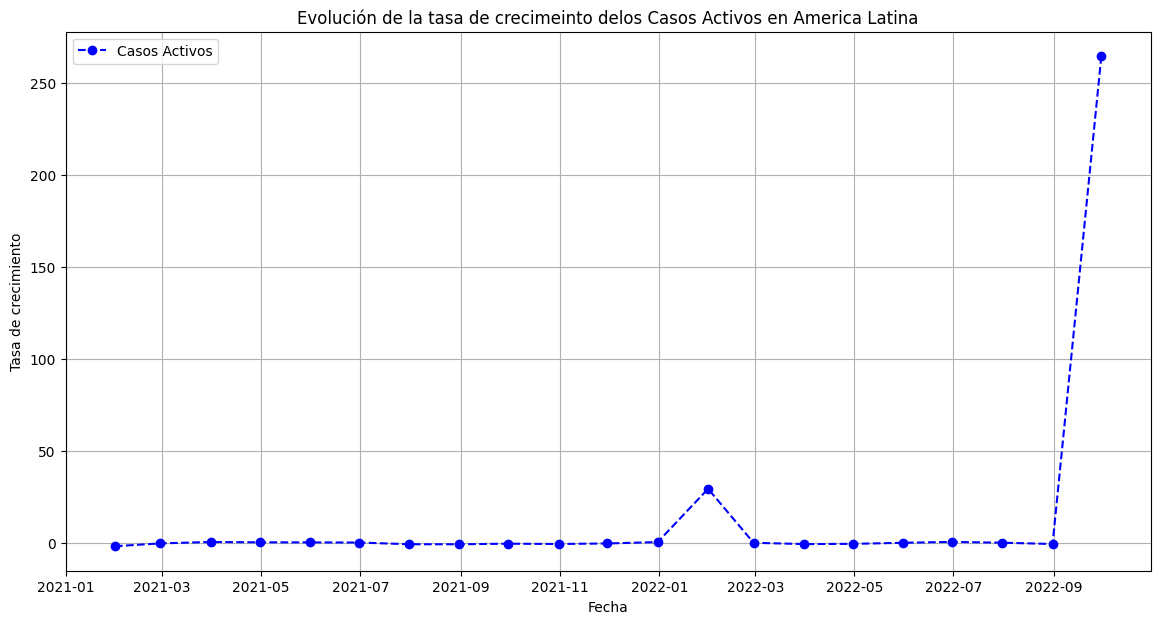

In [56]:
# Calcular la tasa de crecimiento de casos activos en porcentaje usando pct_change()--- Funcion de pandas que permite calcular la tasa de crecimeinto
data_filtrada['tasa_crecimiento_casos_activos'] = data_filtrada['casos_activos'].pct_change() * 100

# Creaciond de la figura
plt.figure(figsize=(14, 7))

# Grafico de lineas de la tasa de crecimiento de los casos activos en America Latina
plt.plot(data_filtrada.resample('ME')['tasa_crecimiento_casos_activos'].mean(), marker='o', linewidth= 1.5,  linestyle = "dashed", label='Casos Activos')
plt.title('Evolución de la tasa de crecimeinto delos Casos Activos en America Latina')
plt.xlabel('Fecha')
plt.ylabel('Tasa de crecimiento')
plt.grid(True)
plt.legend()
    
plt.show()

### Relacion entre la cobertura de vacunacion y la reduccion de casos


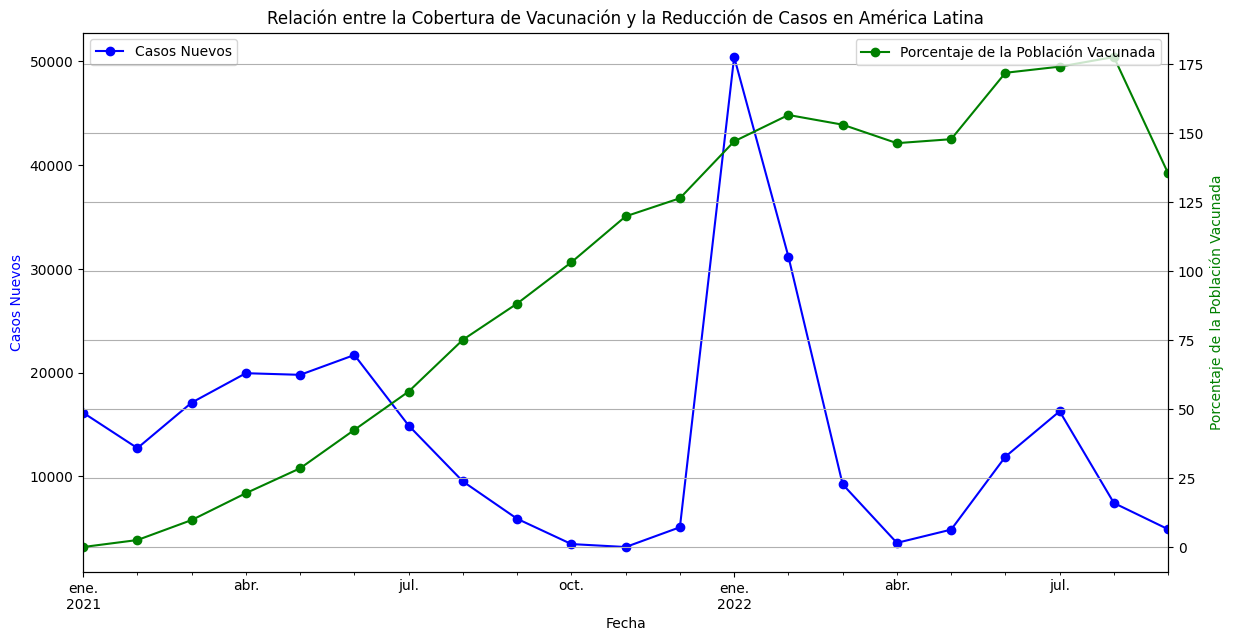

In [57]:
# Como evoluciona la vacunación en América Latina y la reducción de casos de COVID-19

# Creacion de la figura
plt.figure(figsize=(14, 7))
ax1 = plt.gca()
ax2 = ax1.twinx()

# Calculo del porcentaje de vacunacion
data_filtrada['porcentaje_vacunacion'] = data_filtrada['cumulative_vaccine_doses_administered'] / data_filtrada['population'] * 100

# Gráfico mis dos lineplots
data_filtrada.resample('ME').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='blue', marker='o', label='Casos Nuevos')
data_filtrada.resample('ME').mean(numeric_only=True)['porcentaje_vacunacion'].plot(ax=ax2, color='green', marker='o', label='Porcentaje de la Población Vacunada')

# Añadir titulo y etiquetas
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Casos Nuevos', color='blue')
ax2.set_ylabel('Porcentaje de la Población Vacunada', color='green')
ax1.set_title('Relación entre la Cobertura de Vacunación y la Reducción de Casos en América Latina')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.grid(True)

plt.show()

### Progreso de vacunacion por pais

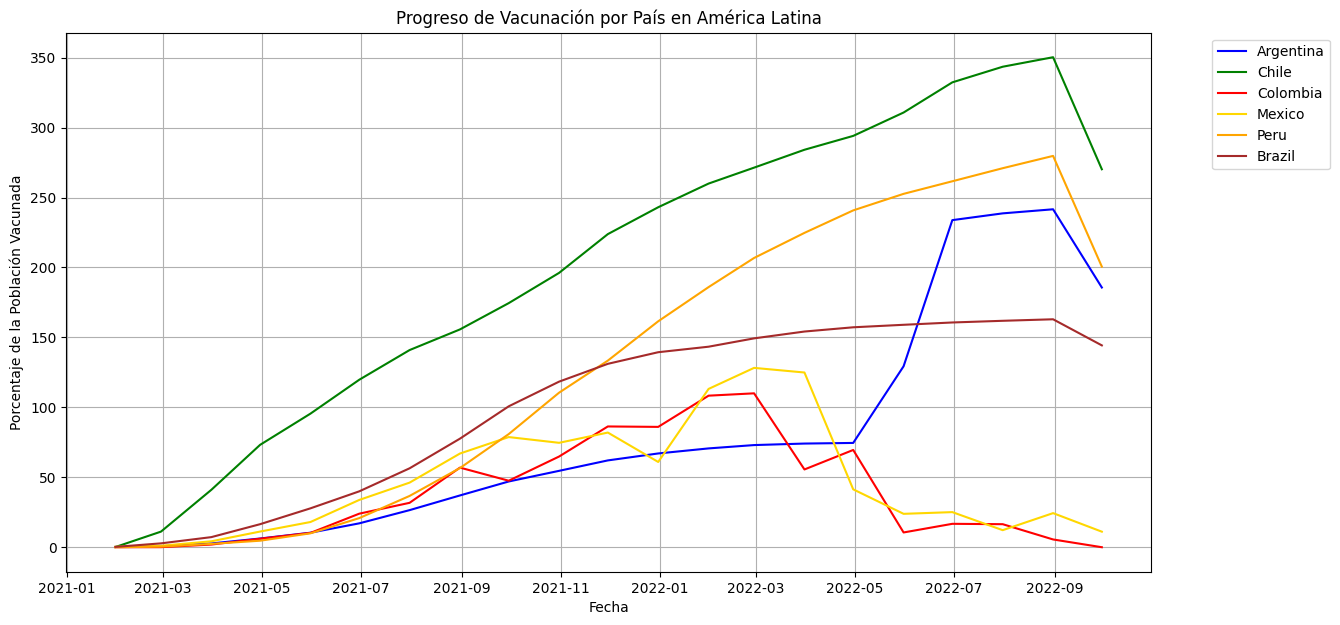

In [58]:
# Crear gráfico de líneas que muestre el progreso de vacunacion por pais

# Creacion de la figura
plt.figure(figsize=(14, 7))

# Ciclo for para que graficar el progreso de vacunacion por cada pais
for country_name in paises_seleccionados:
    data_pais = data_filtrada[data_filtrada['country_name'] == country_name]
    promedio_porcentaje_vacunacion_pais = data_pais.resample('ME')['porcentaje_vacunacion'].mean()
    plt.plot(promedio_porcentaje_vacunacion_pais.index, promedio_porcentaje_vacunacion_pais, label= country_name)

plt.title('Progreso de Vacunación por País en América Latina')
plt.xlabel('Fecha')
plt.ylabel('Porcentaje de la Población Vacunada')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()

### Nuevos casos y temperatura promedio

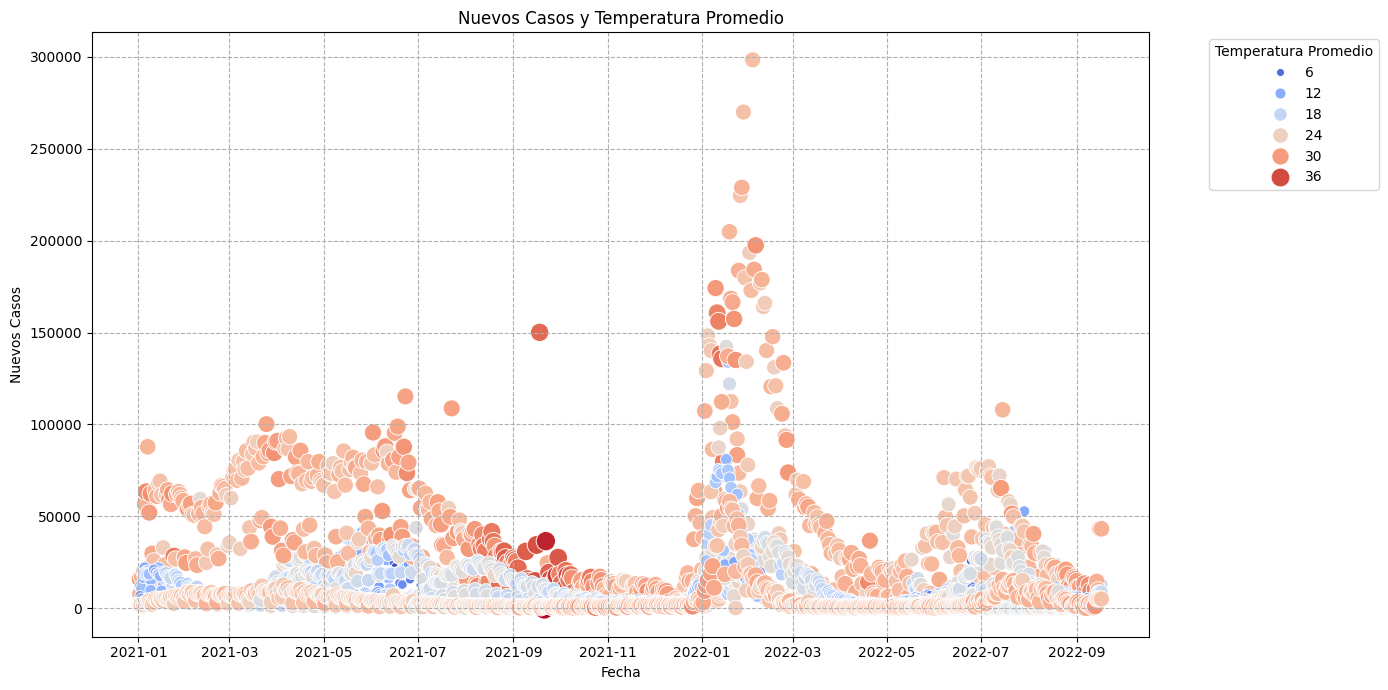

In [59]:
# Nuevos casos y temperatura promedio

# Creacion de la figura
plt.figure(figsize=(14, 7))

# Grafico de dispersion de los nuevos casos y la temperatura promedio
sns.scatterplot(data=data_filtrada, x='date', y='new_confirmed', hue='average_temperature_celsius', palette='coolwarm', size='average_temperature_celsius', sizes=(20, 200))

# Añadir titulo y etiquetas
plt.xlabel('Fecha')
plt.ylabel('Nuevos Casos')
plt.title('Nuevos Casos y Temperatura Promedio')
plt.legend(title='Temperatura Promedio', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--')
plt.tight_layout()

plt.show()

### Impacto de la urbanizacion en la propagacion del Covid-19

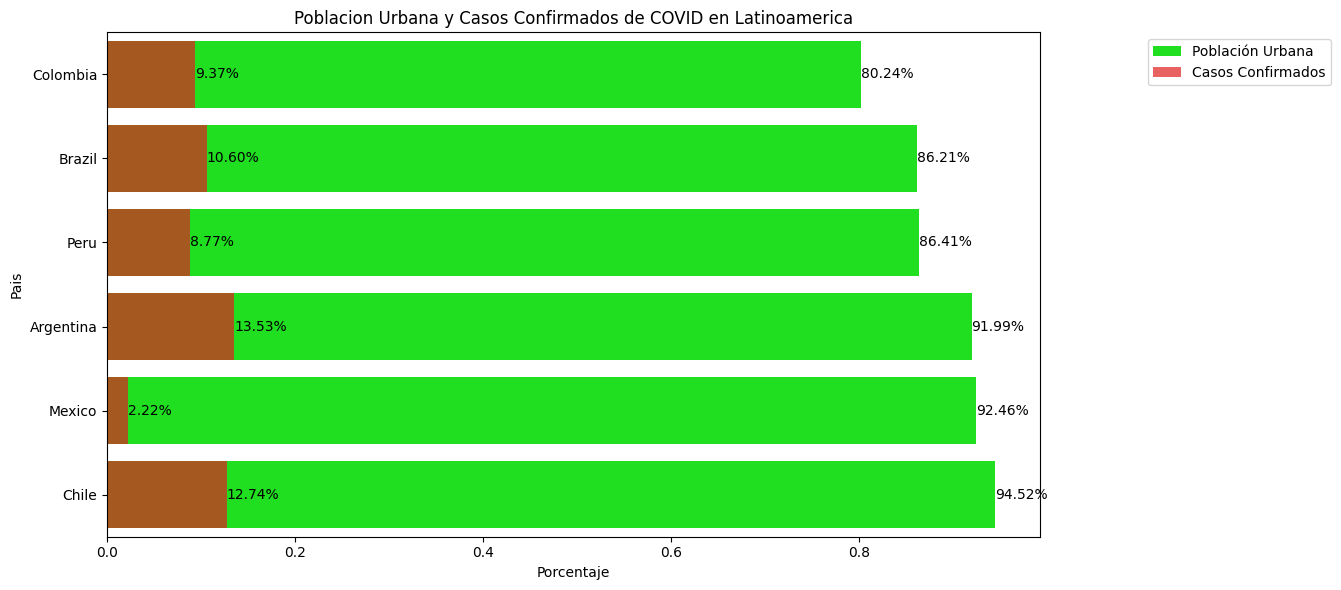

In [60]:
# Impacto de la urbanizacion en el propagacion del covid

# Creacion de nuevas columnas porcentaje_poblacion_urbana y porcentaje_poblacion_covid
data_filtrada['porcentaje_poblacion_urbana'] = data_filtrada['population_urban'] / data_filtrada['population']
data_filtrada['porcentaje_poblacion_covid'] = data_filtrada['cumulative_confirmed'] / data_filtrada['population']

# 
casos_urbanos = data_filtrada.groupby('country_name').last().sort_values(by='porcentaje_poblacion_urbana')

# Creacion de la figura
plt.figure(figsize=(14, 6))

# Grafico de barras del porcentaje de la poblacion urbana
ax = sns.barplot(data=casos_urbanos, x='porcentaje_poblacion_urbana', y='country_name', color='lime', label='Población Urbana')

# Añadir etiquetas para el porcentaje de población urbana
for index, value in enumerate(casos_urbanos['porcentaje_poblacion_urbana']):
    ax.text(value, index, f'{value*100:.2f}%', color='black', ha="left", va="center")

# Superponer la segunda barra para porcentaje confirmado
ax2 = sns.barplot(data=casos_urbanos, x='porcentaje_poblacion_covid', y='country_name', alpha=0.7, color='red', label='Casos Confirmados')

# Añadir etiquetas para el porcentaje confirmado
for index, value in enumerate(casos_urbanos['porcentaje_poblacion_covid']):
    ax2.text(value, index, f'{value*100:.2f}%', color='black', ha="left", va="center")

# Anañir titulo y etiquetas
plt.xlabel('Porcentaje')
plt.ylabel('Pais')
plt.title('Poblacion Urbana y Casos Confirmados de COVID en Latinoamerica')
plt.legend(bbox_to_anchor=(1.32, 1), loc="upper right")
plt.tight_layout()

plt.show()

### Evolucion semanal y anual de los casos nuevos

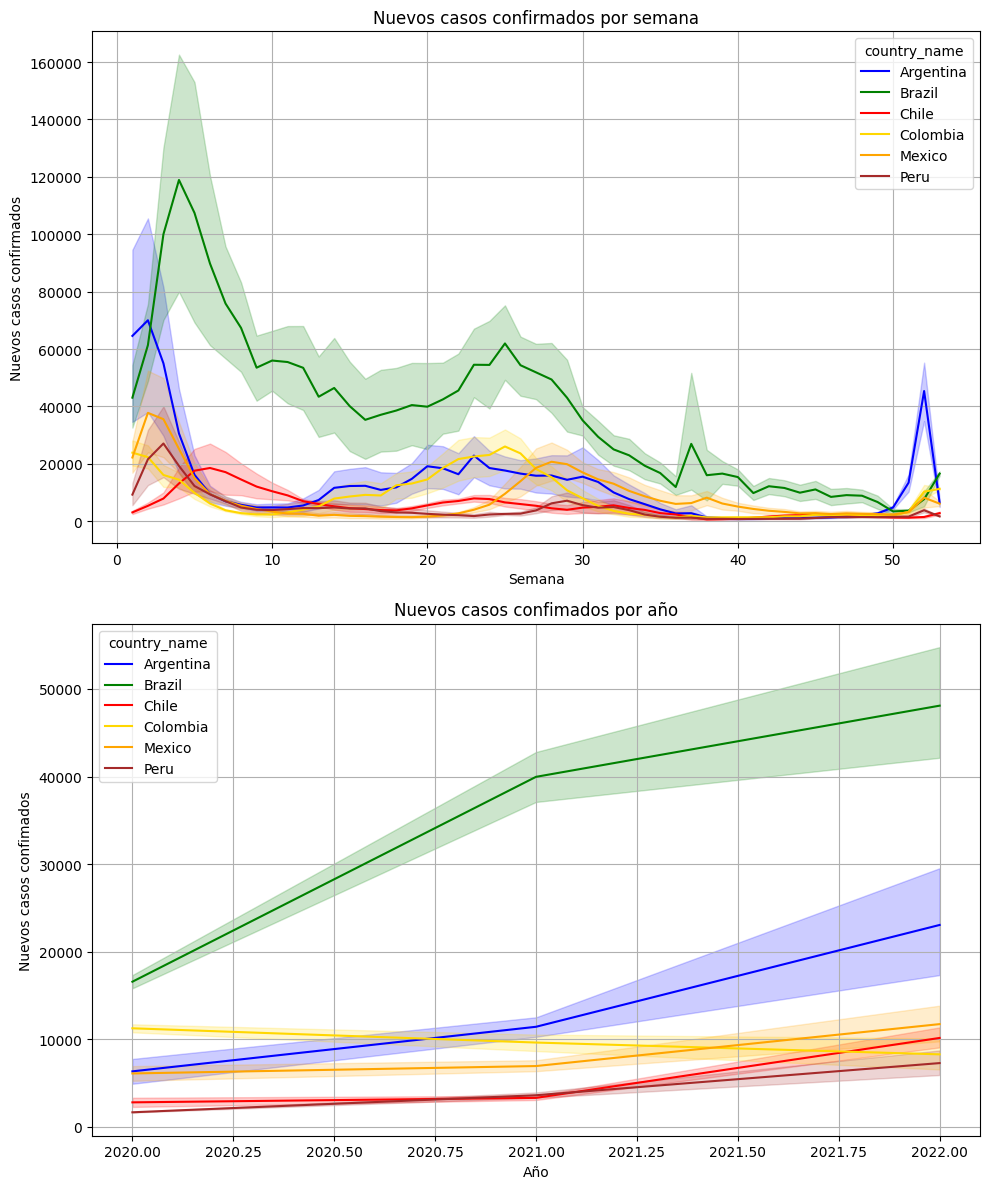

In [61]:
# Evolucion semanal de los casos
data_filtrada['semana'] = data_filtrada.index.isocalendar().week
data_filtrada['año'] = data_filtrada.index.isocalendar().year

# Agrupar los datos por país y trimestre
casos_por_semana = data_filtrada.groupby(['country_name', 'semana', 'new_confirmed']).sum().reset_index()
casos_por_año = data_filtrada.groupby(['country_name', 'año', 'new_confirmed']).sum().reset_index()

# Definir la paleta de colores
paleta_colores=['blue', 'green', 'red', 'gold', 'orange', 'brown']

# Aplicar la paleta a un gráfico de Seaborn
sns.set_palette(paleta_colores)

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(10,12))

# Gráfico de lienas de los nuevos casos confirmados por semana
sns.lineplot(data=casos_por_semana, x='semana', y='new_confirmed', hue='country_name', ax=ax[0])
ax[0].set_title('Nuevos casos confirmados por semana')
ax[0].set_xlabel('Semana')
ax[0].set_ylabel('Nuevos casos confirmados')
ax[0].grid(True)

# Gráfico de lineas de los nuevos fallecidos por año
sns.lineplot(data=casos_por_año, x='año', y='new_confirmed', hue='country_name', ax=ax[1])
ax[1].set_title('Nuevos casos confimados por año')
ax[1].set_xlabel('Año')
ax[1].set_ylabel('Nuevos casos confimados')
ax[1].grid(True)

plt.tight_layout()
plt.show()

### Distribucion de la poblacion por edad en los distintos paises

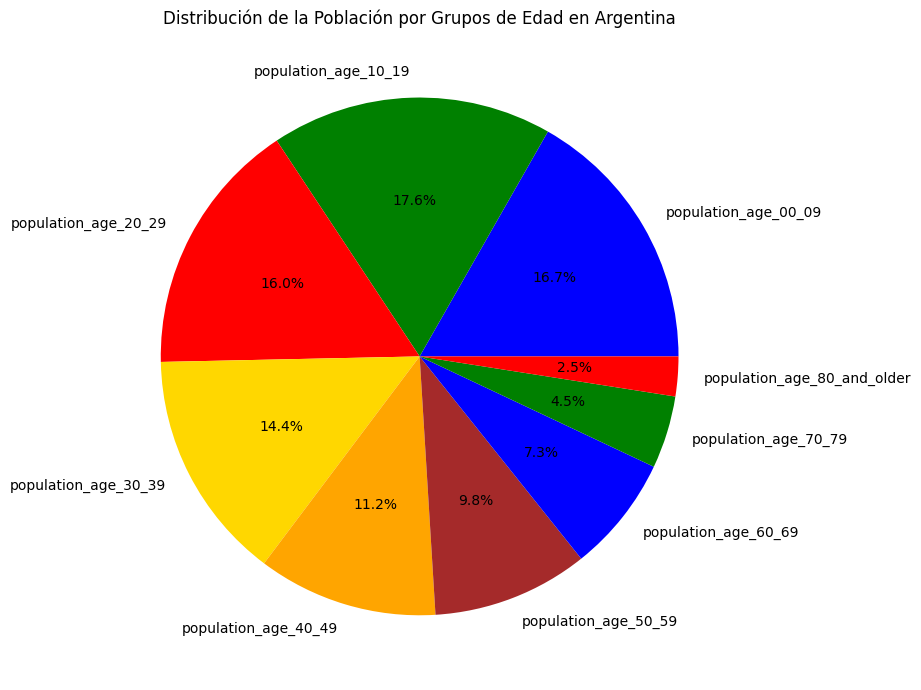

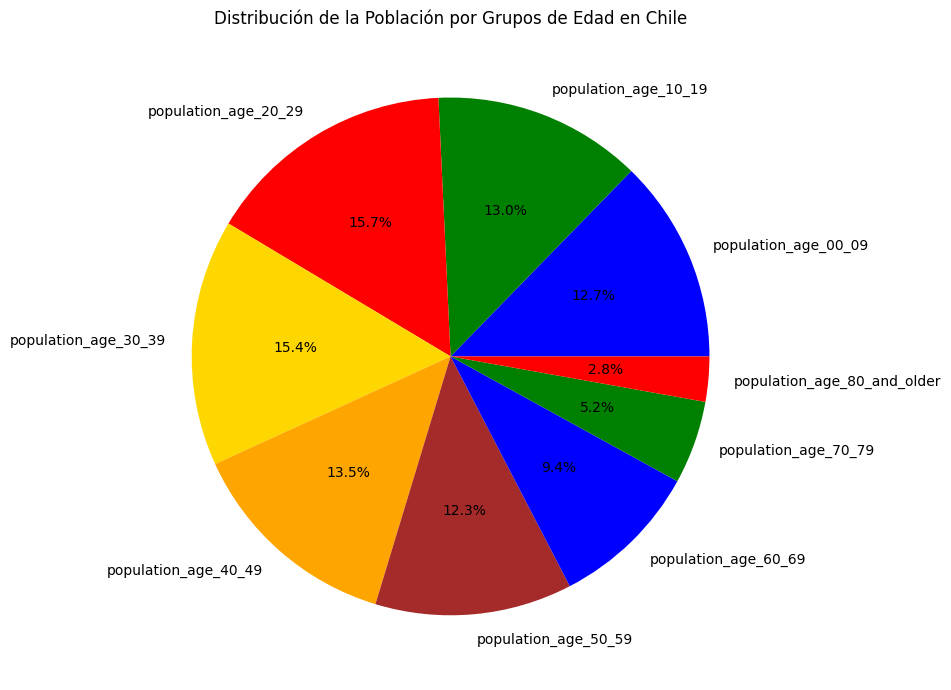

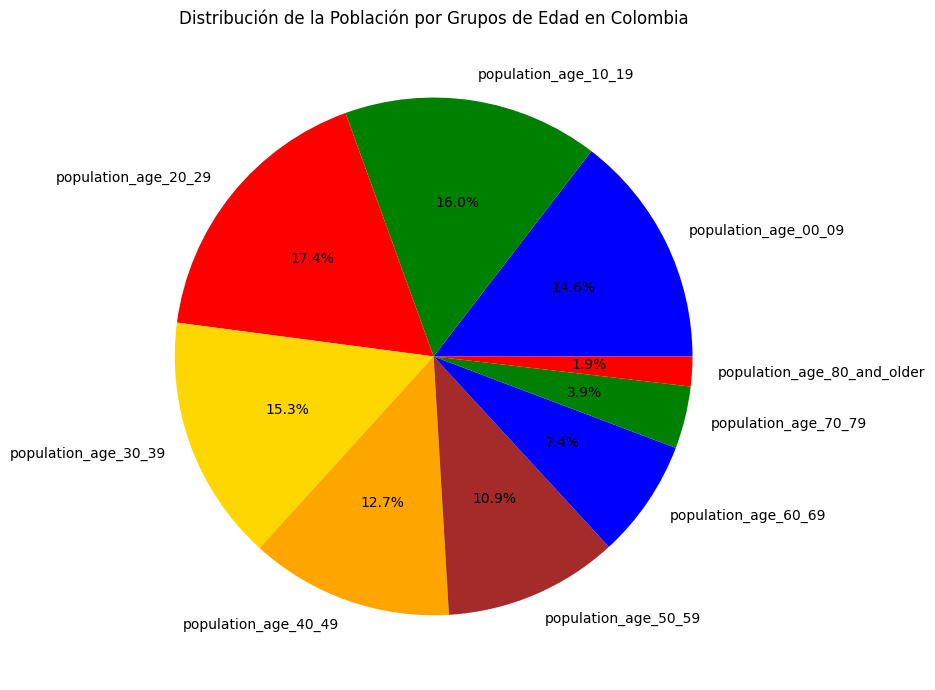

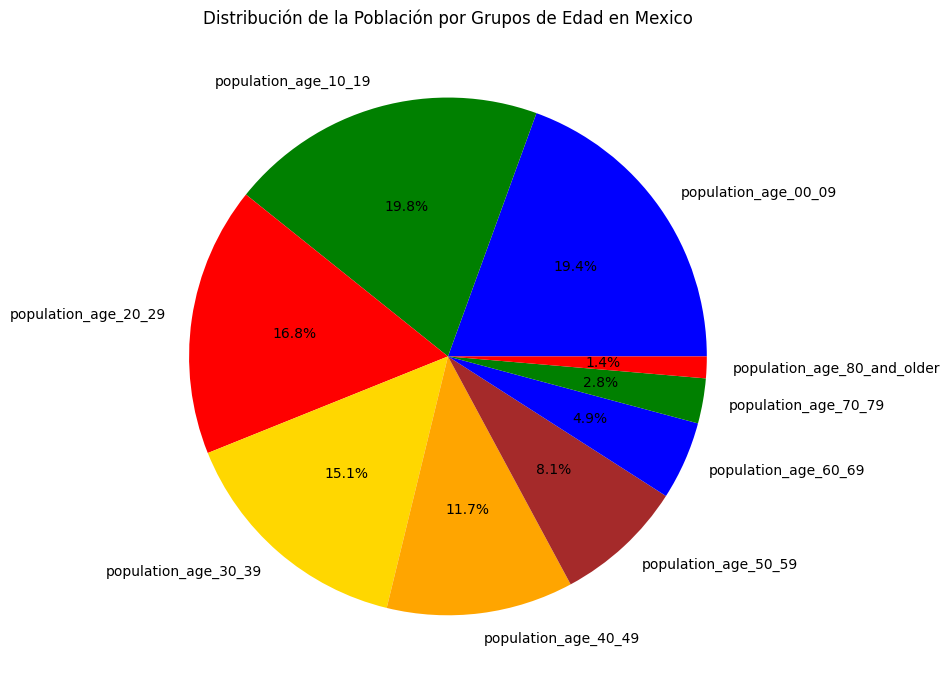

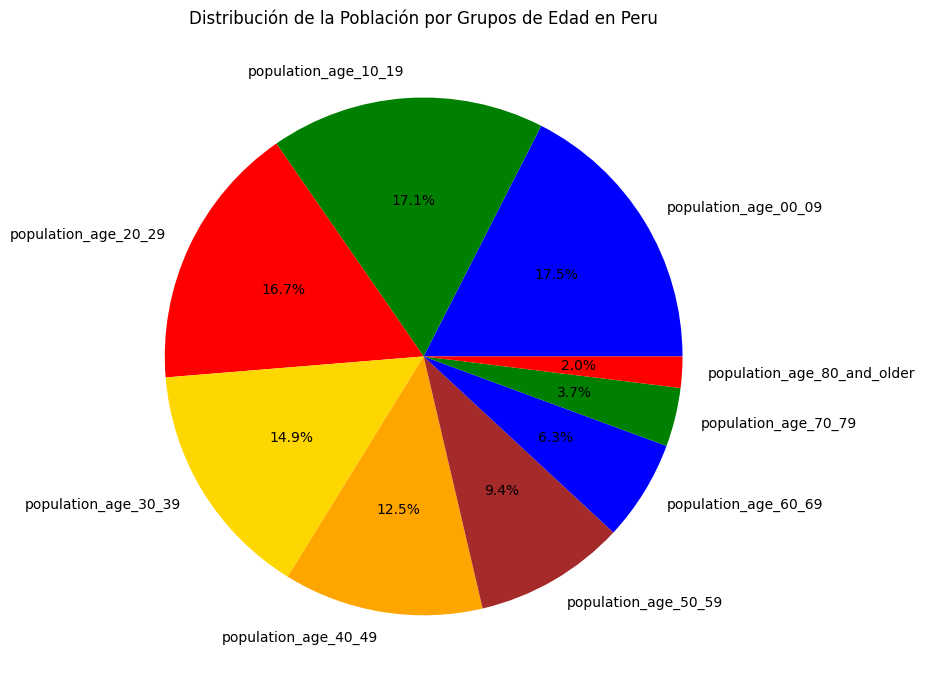

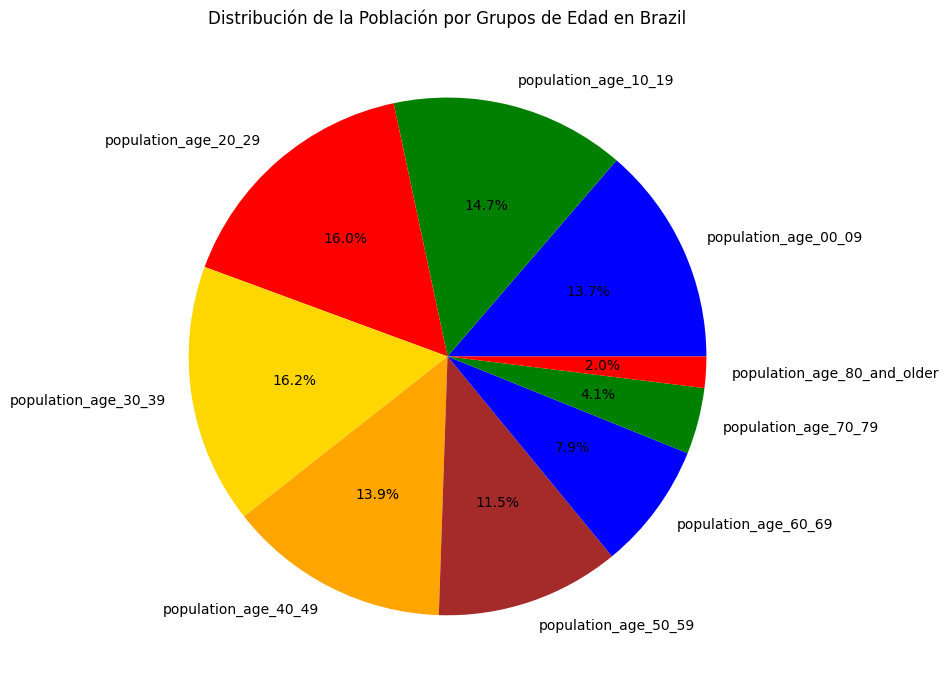

In [62]:
# Distribucion de la poblacion por grupos de edad por pais

# Ciclo for 
for country_name in paises_seleccionados:
    # Filtrar los datos para el pais actual
    datos_pais = data_filtrada[data_filtrada['country_name'] == country_name]
    
    # Maximo de la población en cada grupo de edad por pais 
    total_poblacion_por_edad = datos_pais[variables_grupo_edad].max()
    
    # Grafico de torta del porcentaje de cada grupo de edad por pais
    plt.figure(figsize=(14, 7))
    total_poblacion_por_edad.plot(kind='pie', autopct='%1.1f%%',)
    
    # Añadir titulo y etiquetas
    plt.title(f'Distribución de la Población por Grupos de Edad en {country_name}')
    plt.tight_layout()
    
    plt.show()

### Comparacion de estrategias de vacunacion en America Latina

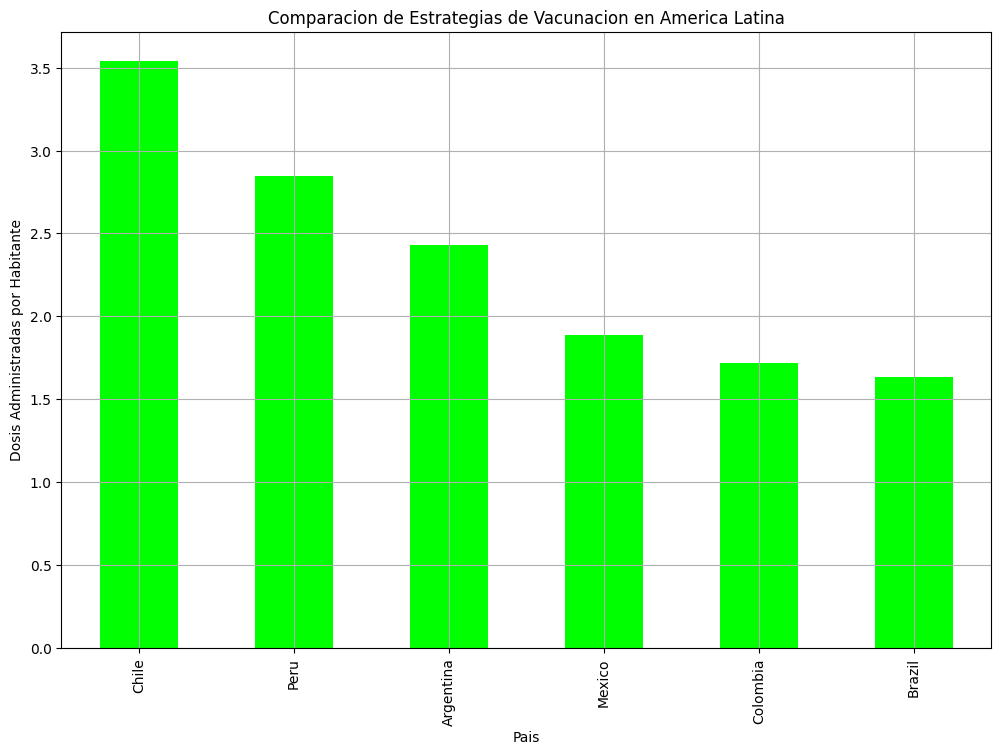

In [63]:
# Comparacion de estrategias de vacunacion en America Latina

# Calculo para medir la cantidad de dosis administradas por habitante por pais
estrategia_de_vacunacion = data_filtrada.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / data_filtrada.groupby('country_name')['population'].mean()

# Grafico de barras de la cantidad de dosis administradas por habitante por pais
estrategia_de_vacunacion.sort_values(ascending=False).plot(kind='bar', figsize=(12, 8), color='lime', grid=True)

plt.xlabel('Pais')
plt.ylabel('Dosis Administradas por Habitante')
plt.title('Comparacion de Estrategias de Vacunacion en America Latina')
plt.show()

### Evolucion del numero de muertes diarias

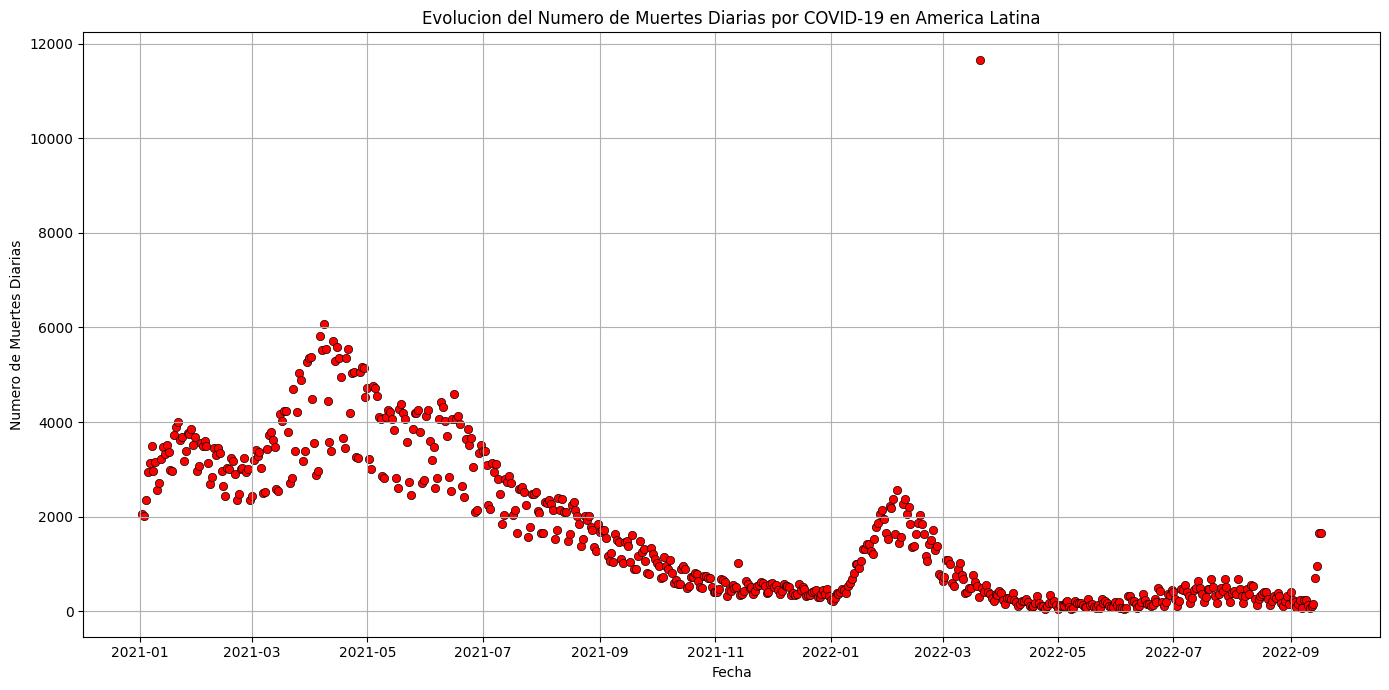

In [64]:
# Resamplear y calcular la suma mensual de nuevas muertes
muertes_diarias = data_filtrada['new_deceased'].resample('D').sum().reset_index()

# Grafico de dispersion de la evolucion de las muertes diarias por covid en America Latina
plt.figure(figsize=(14, 7))
sns.scatterplot(data=muertes_diarias, x='date', y='new_deceased', color='red',edgecolor='black')

# Añadir titulo y etiquetas
plt.title('Evolucion del Numero de Muertes Diarias por COVID-19 en America Latina')
plt.xlabel('Fecha')
plt.ylabel('Numero de Muertes Diarias')
plt.grid(True)
plt.tight_layout()
plt.show()

### Prevalencia de condiciones preexistentes en paises con altas y bajas tasas de mortalidad

In [65]:
# Calculo y creacion de la nueva columna porcentaje_muertes
data_filtrada['porcentaje_muertes'] = data_filtrada['cumulative_deceased'] / data_filtrada['population']
data_filtrada

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina           7767   
2021-01-03           AR           AR    Argentina           4934   
2021-01-04           AR           AR    Argentina          13953   
2021-01-05           AR           AR    Argentina          14085   
2021-01-06           AR           AR    Argentina          14496   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru           1150   
2022-09-14           PE           PE         Peru           5032   
2022-09-15           PE           PE         Peru           5032   
2022-09-16           PE           PE         Peru           5032   
2022-09-17           PE           PE         Peru           5032   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02           166               1670634                46688   
2021-01-03           157               1675568                46845   
2021-01-04           157               1689521                47002   
2021-01-05           160               1703606                47162   
2021-01-06           131               1718102                47293   
...                  ...                   ...                  ...   
2022-09-13            22               4127612               216173   
2022-09-14           197               2576905               188954   
2022-09-15           197               2576905               188954   
2022-09-16           197               2576905               188954   
2022-09-17           197               2576905               188954   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                  20334    44938712   
2021-01-03                                  20529    44938712   
2021-01-04                                  25164    44938712   
2021-01-05                                  29852    44938712   
2021-01-06                                  34162    44938712   
...                                           ...         ...   
2022-09-13                                      0    29381884   
2022-09-14                                      0    29381884   
2022-09-15                                      0    29381884   
2022-09-16                                      0    29381884   
2022-09-17                                      0    29381884   

            population_male  ...   año      mes  trimestre  casos_activos  \
date                         ...                                            
2021-01-02         19523766  ...  2020  2021-01     2021Q1        1623946   
2021-01-03         19523766  ...  2020  2021-01     2021Q1        1628723   
2021-01-04         19523766  ...  2021  2021-01     2021Q1        1642519   
2021-01-05         19523766  ...  2021  2021-01     2021Q1        1656444   
2021-01-06         19523766  ...  2021  2021-01     2021Q1        1670809   
...                     ...  ...   ...      ...        ...            ...   
2022-09-13         14450757  ...  2022  2022-09     2022Q3        3911439   
2022-09-14         14450757  ...  2022  2022-09     2022Q3        2387951   
2022-09-15         14450757  ...  2022  2022-09     2022Q3        2387951   
2022-09-16         14450757  ...  2022  2022-09     2022Q3        2387951   
2022-09-17         14450757  ...  2022  2022-09     2022Q3        2387951   

            tasa_crecimiento_casos_activos  porcentaje_vacunacion  \
date                                                                
2021-01-02                             NaN               0.045248   
2021-01-03                        0.294160               0.045682   
2021-01-04                        0.847044               0.055996   
2021-01-0

In [66]:
# Visualizar los 3 primeros paises con alta mortalidad
alta_mortalidad_paises = data_filtrada.groupby('country_name')['porcentaje_muertes'].max().sort_values(ascending=False).nlargest(3).index 
alta_mortalidad_paises

Index(['Peru', 'Chile', 'Brazil'], dtype='object', name='country_name')

In [67]:
# Visualizar los ultimos 3 paises con alta mortalidad
baja_mortalidad_paises = data_filtrada.groupby('country_name')['porcentaje_muertes'].max().sort_values(ascending=False).nsmallest(3).index
baja_mortalidad_paises

Index(['Mexico', 'Argentina', 'Colombia'], dtype='object', name='country_name')

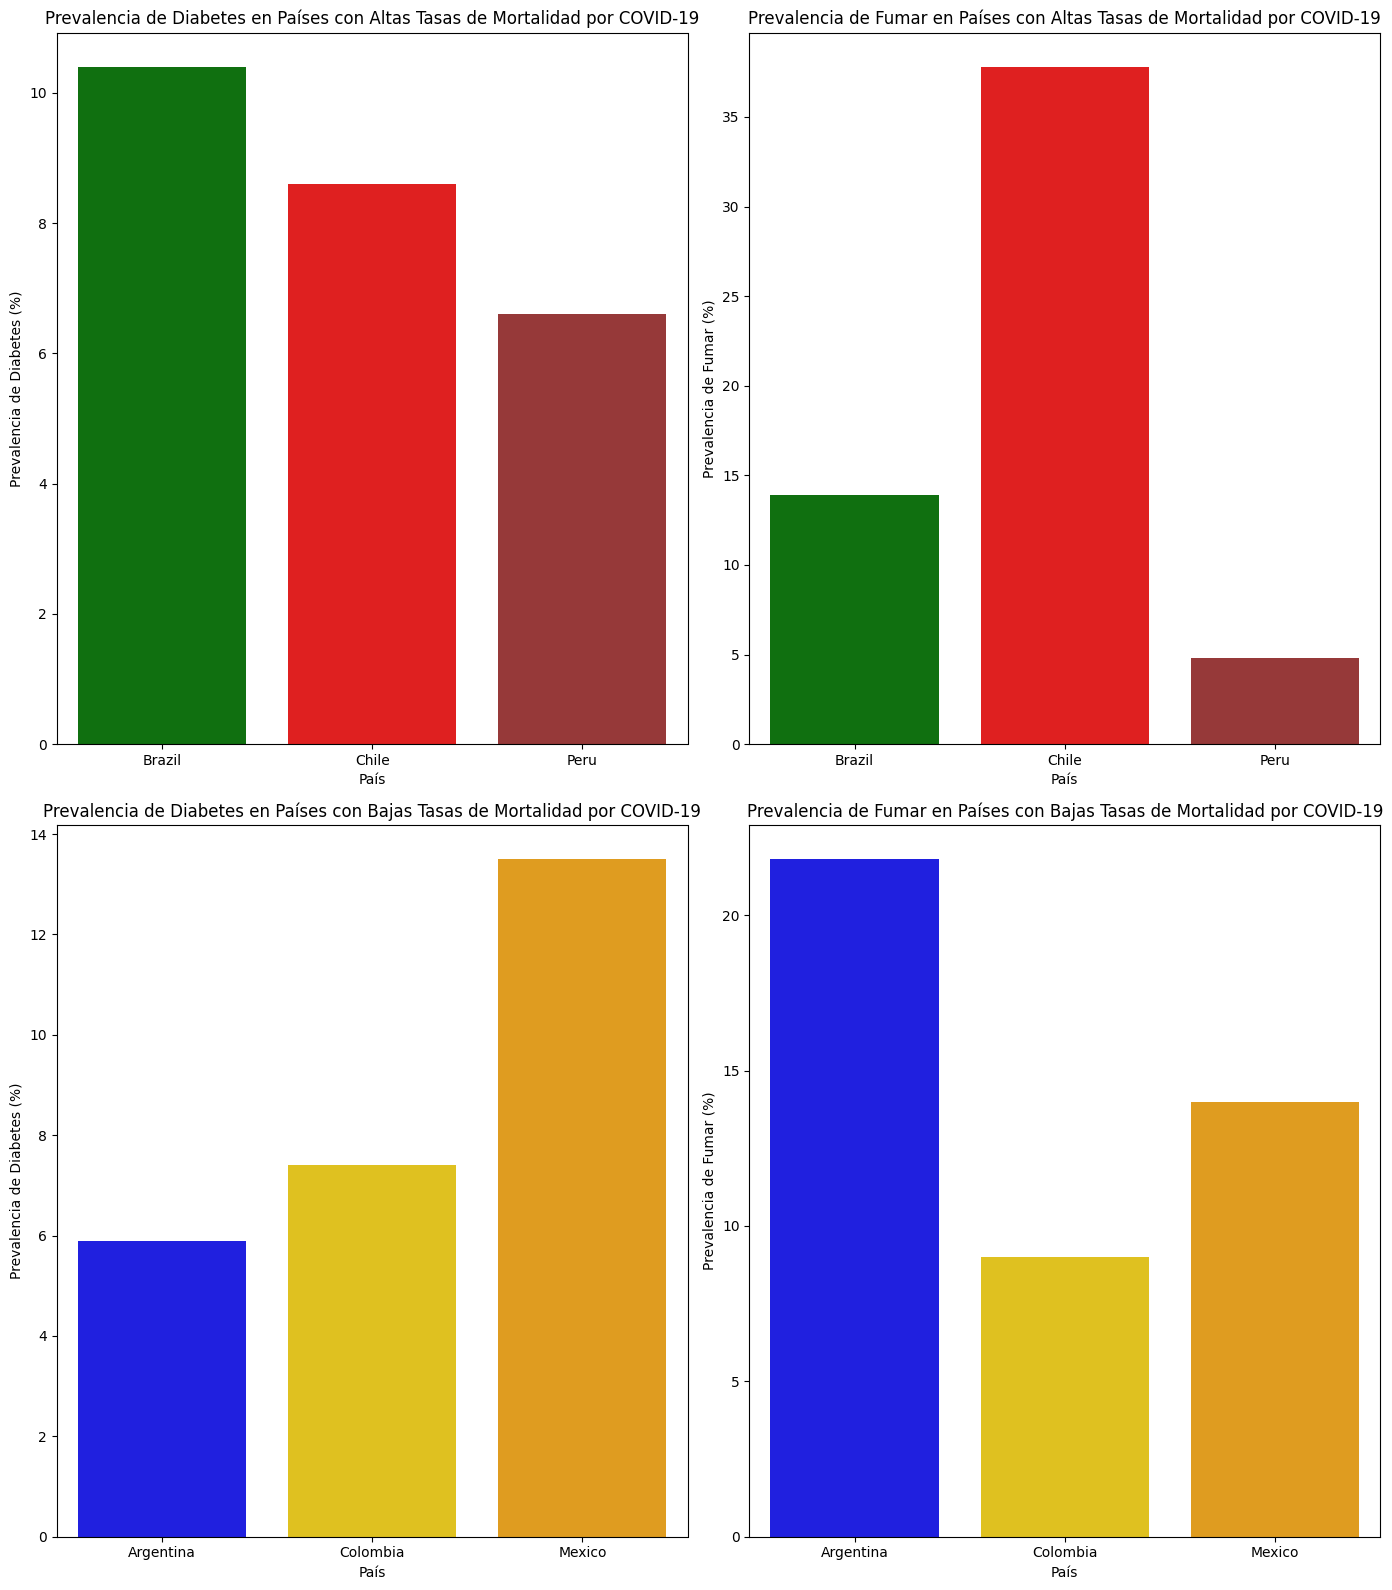

In [68]:
# Variables a utilizar
alta_mortalidad_paises = data_filtrada.groupby('country_name')['porcentaje_muertes'].max().sort_values(ascending=False).nlargest(3).index 
baja_mortalidad_paises = data_filtrada.groupby('country_name')['porcentaje_muertes'].max().sort_values(ascending=False).nsmallest(3).index

# Filtrar los datos para estos paises
datos_alta_mortalidad = data_filtrada[data_filtrada['country_name'].isin(alta_mortalidad_paises)]
datos_baja_mortalidad = data_filtrada[data_filtrada['country_name'].isin(baja_mortalidad_paises)]

fig, ((ax1, ax2), (ax3, ax4)), = plt.subplots(
    ncols=2,
    nrows=2,
    figsize=(14, 16)
)

# Alta prevalencia de diabetes
sns.barplot(data=datos_alta_mortalidad, x='country_name', y='diabetes_prevalence', hue='country_name', palette=['green', 'red', 'brown'], ax=ax1)
ax1.set_xlabel('País')
ax1.set_ylabel('Prevalencia de Diabetes (%)')
ax1.set_title('Prevalencia de Diabetes en Países con Altas Tasas de Mortalidad por COVID-19')

# Alta prevalencia de fumar
sns.barplot(data=datos_alta_mortalidad, x='country_name', y='smoking_prevalence', hue='country_name', palette=['green', 'red', 'brown'], ax=ax2)
ax2.set_xlabel('País')
ax2.set_ylabel('Prevalencia de Fumar (%)')
ax2.set_title('Prevalencia de Fumar en Países con Altas Tasas de Mortalidad por COVID-19')

# Baja prevalencia de diabetes
sns.barplot(data=datos_baja_mortalidad, x='country_name', y='diabetes_prevalence', hue='country_name', palette=['blue', 'gold', 'orange'], ax=ax3)
ax3.set_xlabel('País')
ax3.set_ylabel('Prevalencia de Diabetes (%)')
ax3.set_title('Prevalencia de Diabetes en Países con Bajas Tasas de Mortalidad por COVID-19')

# Baja prevalencia de fumar
sns.barplot(data=datos_baja_mortalidad, x='country_name', y='smoking_prevalence', hue='country_name', palette=['blue', 'gold', 'orange'], ax=ax4)
ax4.set_xlabel('País')
ax4.set_ylabel('Prevalencia de Fumar (%)')
ax4.set_title('Prevalencia de Fumar en Países con Bajas Tasas de Mortalidad por COVID-19')

plt.tight_layout()

plt.show()



### Variacion mensual de casos y muertes

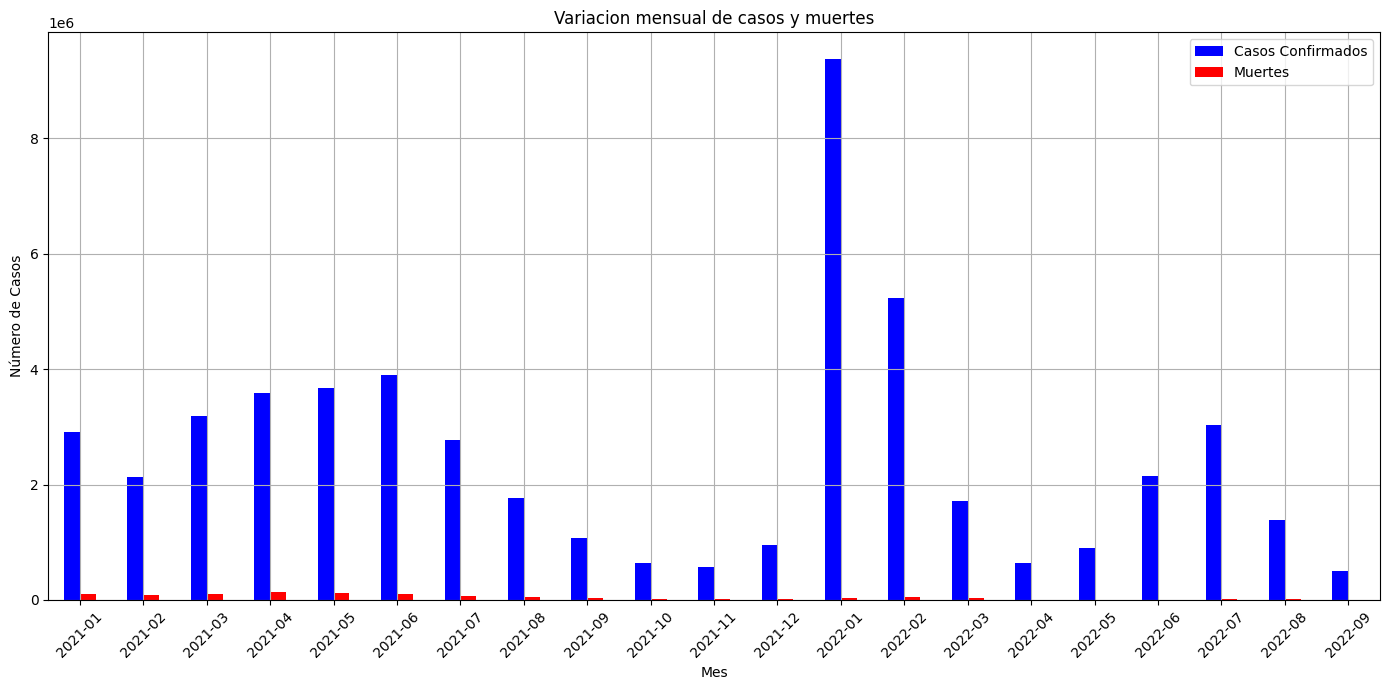

In [69]:
# Variacion mensual de casos y muertes

# Agrupar por 'mes' y obtener el valor máximo de 'cumulative_confirmed' y 'cumulative_deceased'
casos_y_muertes = data_filtrada.groupby('mes')[['new_confirmed', 'new_deceased']].sum()

# Grafico de barras de la variacion mensual de casos y muertes
casos_y_muertes.plot(kind='bar', figsize=(14, 7), color=['blue', 'red'])

# Añadir titulo y etiquetas
plt.title('Variacion mensual de casos y muertes')
plt.xlabel('Mes')
plt.ylabel('Número de Casos')
plt.legend(['Casos Confirmados', 'Muertes'])
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### Analisis temporal de la mortalidad

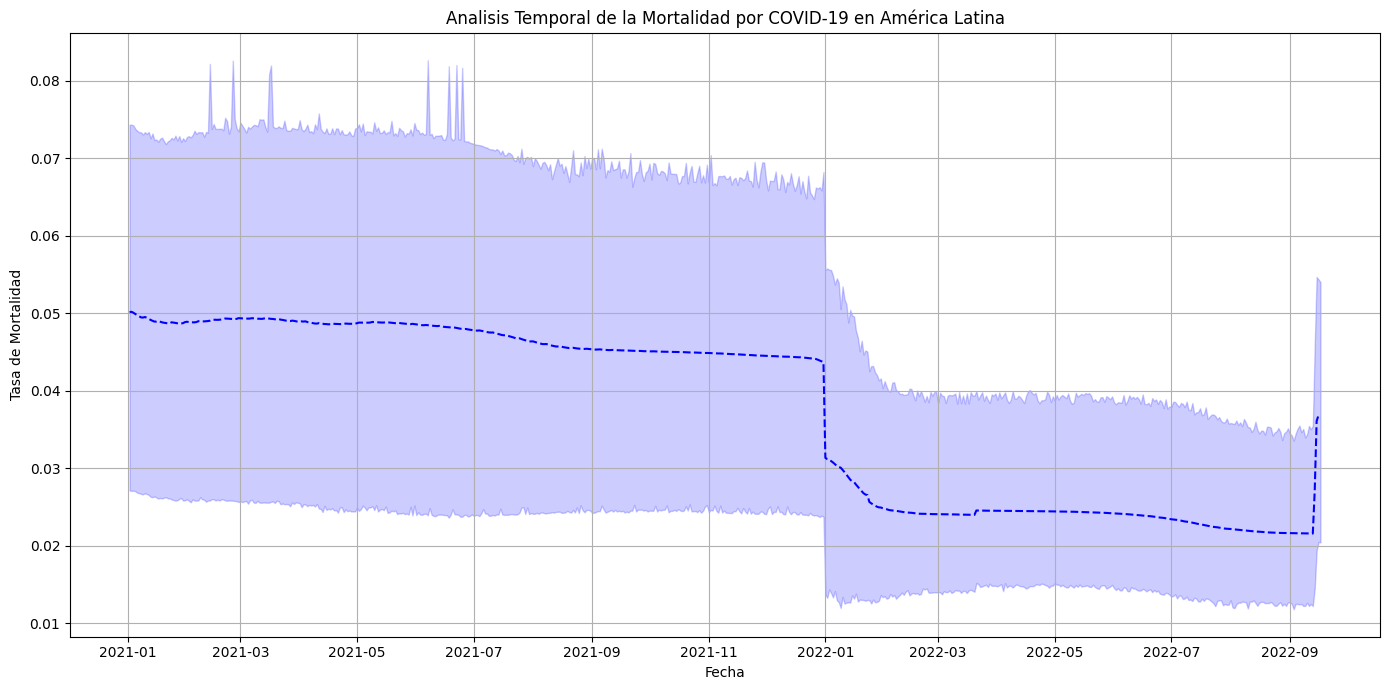

In [70]:
# Analisis temporal de la mortalidad

# Creacion y calculo de la nueva columna tasa_de_mortalidad

data_filtrada['tasa_de_mortalidad'] = data_filtrada['cumulative_deceased'] / data_filtrada['cumulative_confirmed']

# Creacion de la figura y grafico de linea de la tasa de mortalidad por covid en America Latina
plt.figure(figsize=(14, 7))
sns.lineplot(data=data_filtrada, x='date', y='tasa_de_mortalidad', estimator='mean', linewidth= 1.5, linestyle='--')

# Añadir titulo y etiquetas
plt.title('Analisis Temporal de la Mortalidad por COVID-19 en América Latina')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Mortalidad')
plt.grid(True)
plt.tight_layout()
plt.show()

### Comparación de la Situación Actual (Contexto de los datos)

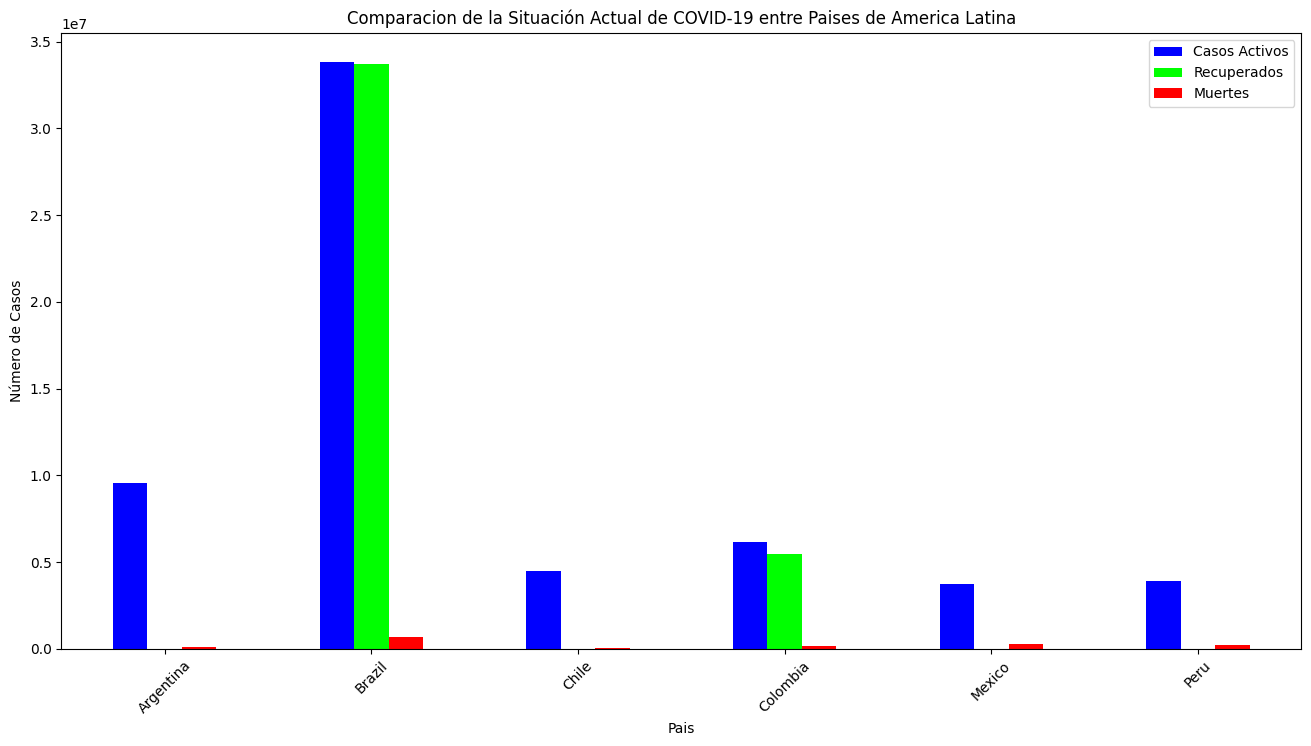

In [71]:
# Comparacion de la situacion actual del covid por pais

# Calculo de la situacion actual del covid por pais
situacion_actual = data_filtrada.groupby('country_name')[['casos_activos', 'cumulative_recovered', 'cumulative_deceased']].max()

# Grafico de barras agrupadas de la situacion actual del codiv por pais
situacion_actual.plot(kind='bar', stacked=False, figsize=(16, 8), color=['blue', 'lime', 'red'])

# Añadir titulo y etiquetas
plt.title('Comparacion de la Situación Actual de COVID-19 entre Paises de America Latina')
plt.xlabel('Pais')
plt.ylabel('Número de Casos')
plt.legend(['Casos Activos', 'Recuperados', 'Muertes'])
plt.xticks(rotation=45)

plt.show()

In [72]:
data_filtrada.to_csv('DatosFinalesFiltrado.csv', index=False)